In [1]:
library(Seurat)
library(ggplot2)
library(enrichR)
library(stringr)
library(RColorBrewer)
library(pheatmap)
library(dplyr)
library(scales)
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(tidyr)
library(tibble)
library(grid)
library(Matrix)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from

Allen brain metadata from https://idk-etl-prod-download-bucket.s3.amazonaws.com/aibs_human_ctx_smart-seq/metadata.csv

# Explore Allen Data

In [ ]:
allen_seurat = readRDS("allen_seurat.rds")

In [3]:
head(allen_seurat)

,orig.ident,nCount_RNA,nFeature_RNA,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,⋯,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
F2S4_160113_027_A01,F2S4,975405,6778,F2S4_160113_027_A01,LS-15005h_S01_E1-50,nucleus,,NA,,,⋯,NA,,,NA,,#3DCC3D,2,H200.1025,True,Outlier L1-3 SST OR2AD1P
F2S4_160113_027_B01,F2S4,1679385,7790,F2S4_160113_027_B01,LS-15005h_S02_E1-50,nucleus,#E170FE,32,Inh L2-5 VIP TOX2,#0066FF,⋯,32,,#E170FE,32,Neuron 032,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_C01,F2S4,1600902,8696,F2S4_160113_027_C01,LS-15005h_S03_E1-50,nucleus,#8E5864,2,Inh L1 LAMP5 GGT8P,#0066FF,⋯,2,,#8E5864,2,Neuron 002,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_D01,F2S4,1372513,7966,F2S4_160113_027_D01,LS-15005h_S04_E1-50,nucleus,#8B5862,1,Inh L1 LAMP5 NDNF,#0066FF,⋯,1,,#8B5862,1,Neuron 001,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_E01,F2S4,1689105,9377,F2S4_160113_027_E01,LS-15005h_S05_E1-50,nucleus,#CF6EC9,34,Inh L1-3 VIP ZNF322P1,#0066FF,⋯,34,,#CF6EC9,34,Neuron 034,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_F01,F2S4,1341173,8453,F2S4_160113_027_F01,LS-15005h_S06_E1-50,nucleus,#E693CE,35,Inh L3 VIP CBLN1,#0066FF,⋯,35,,#E693CE,35,Neuron 035,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_G01,F2S4,1077859,8251,F2S4_160113_027_G01,LS-15005h_S07_E1-50,nucleus,#8E5A63,3,Inh L1-4 LAMP5 DUSP4,#0066FF,⋯,3,Lamp5 Rosehip,#8E5A63,3,Neuron 003,#3DCC3D,2,H200.1025,False,
F2S4_160113_028_B01,F2S4,1737064,8626,F2S4_160113_028_B01,LS-15005h_S10_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,62,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,
F2S4_160113_028_C01,F2S4,2022681,10909,F2S4_160113_028_C01,LS-15005h_S11_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,62,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,


In [4]:
colnames(allen_seurat@meta.data)

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "sample_name"                
 [5] "exp_component_name"          "specimen_type"              
 [7] "cluster_color"               "cluster_order"              
 [9] "cluster_label"               "class_color"                
[11] "class_order"                 "class_label"                
[13] "subclass_color"              "subclass_order"             
[15] "subclass_label"              "full_genotype_color"        
[17] "full_genotype_order"         "full_genotype_label"        
[19] "donor_sex_color"             "donor_sex_order"            
[21] "donor_sex_label"             "region_color"               
[23] "region_order"                "region_label"               
[25] "cortical_layer_color"        "cortical_layer_order"       
[27] "cortical_layer_label"        "cell_type_accession_color"  
[29] "cell_type_accession_order"   "cell_type_accession_label"  
[31] "cell_type_alias_color"       "cell_type_order"            
[33] "cell_type_alias_label"       "cell_type_alt_alias_color"  
[35] "cell_type_alt_alias_order"   "cell_type_alt_alias_label"  
[37] "cell_type_designation_color" "cell_type_designation_order"
[39] "cell_type_designation_label" "external_donor_name_color"  
[41] "external_donor_name_order"   "external_donor_name_label"  
[43] "outlier_call"                "outlier_type"

In [6]:
unique(allen_seurat@meta.data$subclass_label)

[1] ""                "VIP"             "LAMP5"           "IT"             
 [5] "PAX6"            "Oligodendrocyte" "Astrocyte"       "L5/6 IT Car3"   
 [9] "L5/6 NP"         "SST"             "L6 CT"           "OPC"            
[13] "PVALB"           "L6b"             "Microglia"       "L5 ET"          
[17] "Pericyte"        "Endothelial"     "L4 IT"           "VLMC"

In [29]:
subset_subclass_label <- c("IT", "L5/6 IT Car3",'L5/6 NP', 'L6 CT', 'L6b', 'L5 ET', 'L4 IT')

In [7]:
unique(allen_seurat@meta.data$cluster_label)

[1] ""                           "Inh L2-5 VIP TOX2"         
  [3] "Inh L1 LAMP5 GGT8P"         "Inh L1 LAMP5 NDNF"         
  [5] "Inh L1-3 VIP ZNF322P1"      "Inh L3 VIP CBLN1"          
  [7] "Inh L1-4 LAMP5 DUSP4"       "Exc L2-3 LINC00507 RPL9P17"
  [9] "Inh L1 SST CXCL14"          "Inh L1 PAX6 GRIP2"         
 [11] "Inh L1-2 VIP PPAPDC1A"      "Oligo L4-6 OPALIN"         
 [13] "Inh L1 PAX6 CA4"            "Inh L1 ADARB2 ADAM33"      
 [15] "Inh L1-4 VIP CHRNA2"        "Astro L1-6 FGFR3 ETNPPL"   
 [17] "Inh L2-6 VIP VIP"           "Inh L1-6 LAMP5 CA13"       
 [19] "Exc L5-6 THEMIS GPR21"      "Exc L5-6 FEZF2 MYBPHL"     
 [21] "Exc L4-5 RORB RPL31P31"     "Exc L4-5 RORB LCN15"       
 [23] "Inh L4-6 SST MTHFD2P6"      "Exc L6 THEMIS LINC00343"   
 [25] "Exc L6 FEZF2 FAM95C"        "Exc L4-5 RORB LINC01474"   
 [27] "OPC L1-6 MYT1"              "Inh L5-6 PVALB FAM150B"    
 [29] "Exc L6 FEZF2 KRT17"         "Inh L5 PVALB CNTNAP3P2"    
 [31] "Inh L5-6 LAMP5 SFTA3"       "Exc L5 RORB SNHG7"         
 [33] "Exc L3-4 RORB SEMA6D"       "Inh L1-5 VIP KCNJ2"        
 [35] "Inh L1-3 VIP SSTR1"         "Inh L1-3 PVALB WFDC2"      
 [37] "Astro L1 FGFR3 MT1G"        "Inh L1 VIP PRSS8"          
 [39] "Exc L3-4 RORB PRSS12"       "Inh L5-6 SST TH"           
 [41] "Inh L3-5 SST MAFB"          "Exc L5 RORB LINC01202"     
 [43] "Inh L5-6 SST ISOC1"         "Oligo L4-6 MOBP COL18A1"   
 [45] "Inh L5-6 SST KLHL14"        "Exc L5-6 FEZF2 CYP26B1"    
 [47] "Exc L3-5 RORB CMAHP"        "Micro L1-6 C1QC"           
 [49] "Exc L6 THEMIS C6orf48"      "Exc L5-6 THEMIS TMEM233"   
 [51] "Exc L5-6 RORB LINC00320"    "Exc L3-4 RORB FOLH1B"      
 [53] "Exc L6 FEZF2 TBC1D26"       "Exc L5 FEZF2 SCN7A"        
 [55] "Exc L6 FEZF2 SLITRK6"       "Inh L1-2 PAX6 SCGN"        
 [57] "Exc L6 FEZF2 P4HA3"         "Exc L5-6 FEZF2 ANKRD20A1"  
 [59] "Exc L4-5 RORB HNRNPA1P46"   "Inh L5-6 PVALB STON2"      
 [61] "Inh L6 LAMP5 C1QL2"         "Astro L1 FGFR3 FOS"        
 [63] "Exc L6 FEZF2 CPZ"           "Inh L6 SST NPY"            
 [65] "Inh L1-3 VIP GGH"           "Inh L2-4 PVALB C8orf4"     
 [67] "Exc L3 RORB CARTPT"         "Exc L6 FEZF2 ETV4"         
 [69] "Exc L5-6 FEZF2 CABP7"       "Inh L6 LHX6 GLP1R"         
 [71] "Inh L1-6 PVALB SCUBE3"      "Inh L2-4 VIP DSEL"         
 [73] "Inh L6 LAMP5 ANKRD20A11P"   "Inh L1 VIP SOX11"          
 [75] "Inh L1 ADARB2 DISP2"        "Inh L1 VIP PCDH20"         
 [77] "Inh L3-6 VIP KCTD13"        "Exc L5-6 THEMIS THTPA"     
 [79] "Inh L2-4 SST AHR"           "Inh L3-6 PVALB MFI2"       
 [81] "Peri L1-6 MUSTN1"           "Inh L3-4 PVALB HOMER3"     
 [83] "Inh L2-4 VIP LGI2"          "Exc L5-6 THEMIS OR1J1"     
 [85] "Endo L2-5 CLDN5"            "Inh L1-2 VIP RPL41P3"      
 [87] "Inh L1-6 VIP RGS16"         "Inh L1-3 VIP ACHE"         
 [89] "Inh L1 VIP TNFAIP8L3"       "Exc L3-5 RORB HSPB3"       
 [91] "Exc L3-5 THEMIS ELOF1"      "Exc L2-4 RORB GRIK1"       
 [93] "Inh L1-6 VIP PENK"          "Inh L1-2 PVALB TAC1"       
 [95] "Inh L1-3 PAX6 NABP1"        "Inh L1-3 VIP CCDC184"      
 [97] "Inh L1-6 VIP RCN1"          "Exc L3-5 FEZF2 ONECUT1"    
 [99] "Exc L6 FEZF2 TBCC"          "Exc L3-5 RORB CD24"        
[101] "VLMC L1-3 CYP1B1"           "Exc L5-6 THEMIS IL7R"      
[103] "Exc L4 RORB BHLHE22"        "Exc L4 RORB CACNG5"        
[105] "Exc L4-5 RORB AIM2"         "Exc L4-6 RORB HPCA"        
[107] "Exc L6 THEMIS EGR3"         "Exc L6 FEZF2 VWA2"         
[109] "Inh L4-5 PVALB TRIM67"      "Exc L4-5 RORB ASCL1"       
[111] "Exc L5-6 FEZF2 RSAD2"       "Exc L3 LINC00507 PSRC1"    
[113] "Exc L3-4 RORB RPS3P6"       "Exc L5 FEZF2 MORN2"        
[115] "Exc L3-5 LINC00507 SLN"     "Exc L3-5 THEMIS UBE2F"     
[117] "Exc L3-5 FEZF2 DCN"         "Exc L4 RORB CCDC168"       
[119] "Exc L3 LINC00507 CTXN3"     "Exc L3 THEMIS PLA2G7"      
[121] "Exc L5 FEZF2 DYRK2"

In [28]:
unique(allen_seurat@meta.data[allen_seurat@meta.data$subclass_label == 'L4 IT',]$cluster_label)

[1] "Exc L2-4 RORB GRIK1"  "Exc L4 RORB BHLHE22"  "Exc L4 RORB CACNG5"  
[4] "Exc L4-5 RORB AIM2"   "Exc L4-5 RORB ASCL1"  "Exc L3-4 RORB RPS3P6"
[7] "Exc L4 RORB CCDC168"

In [30]:
allen_seurat <- NormalizeData(allen_seurat)
allen_seurat <- FindVariableFeatures(allen_seurat)
allen_seurat <- ScaleData(allen_seurat)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [2]:
# Subset using an explicit logical condition
cells_to_keep <- rownames(allen_seurat@meta.data)[grepl("^Inh", allen_seurat@meta.data$cluster_label)]
allen_seurat_Ex <- subset(allen_seurat, cells = cells_to_keep)

Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [3]:
unique(allen_seurat_Ex@meta.data$cluster_label)

[1] "Inh L2-5 VIP TOX2"        "Inh L1 LAMP5 GGT8P"      
 [3] "Inh L1 LAMP5 NDNF"        "Inh L1-3 VIP ZNF322P1"   
 [5] "Inh L3 VIP CBLN1"         "Inh L1-4 LAMP5 DUSP4"    
 [7] "Inh L1 SST CXCL14"        "Inh L1 PAX6 GRIP2"       
 [9] "Inh L1-2 VIP PPAPDC1A"    "Inh L1 PAX6 CA4"         
[11] "Inh L1 ADARB2 ADAM33"     "Inh L1-4 VIP CHRNA2"     
[13] "Inh L2-6 VIP VIP"         "Inh L1-6 LAMP5 CA13"     
[15] "Inh L4-6 SST MTHFD2P6"    "Inh L5-6 PVALB FAM150B"  
[17] "Inh L5 PVALB CNTNAP3P2"   "Inh L5-6 LAMP5 SFTA3"    
[19] "Inh L1-5 VIP KCNJ2"       "Inh L1-3 VIP SSTR1"      
[21] "Inh L1-3 PVALB WFDC2"     "Inh L1 VIP PRSS8"        
[23] "Inh L5-6 SST TH"          "Inh L3-5 SST MAFB"       
[25] "Inh L5-6 SST ISOC1"       "Inh L5-6 SST KLHL14"     
[27] "Inh L1-2 PAX6 SCGN"       "Inh L5-6 PVALB STON2"    
[29] "Inh L6 LAMP5 C1QL2"       "Inh L6 SST NPY"          
[31] "Inh L1-3 VIP GGH"         "Inh L2-4 PVALB C8orf4"   
[33] "Inh L6 LHX6 GLP1R"        "Inh L1-6 PVALB SCUBE3"   
[35] "Inh L2-4 VIP DSEL"        "Inh L6 LAMP5 ANKRD20A11P"
[37] "Inh L1 VIP SOX11"         "Inh L1 ADARB2 DISP2"     
[39] "Inh L1 VIP PCDH20"        "Inh L3-6 VIP KCTD13"     
[41] "Inh L2-4 SST AHR"         "Inh L3-6 PVALB MFI2"     
[43] "Inh L3-4 PVALB HOMER3"    "Inh L2-4 VIP LGI2"       
[45] "Inh L1-2 VIP RPL41P3"     "Inh L1-6 VIP RGS16"      
[47] "Inh L1-3 VIP ACHE"        "Inh L1 VIP TNFAIP8L3"    
[49] "Inh L1-6 VIP PENK"        "Inh L1-2 PVALB TAC1"     
[51] "Inh L1-3 PAX6 NABP1"      "Inh L1-3 VIP CCDC184"    
[53] "Inh L1-6 VIP RCN1"        "Inh L4-5 PVALB TRIM67"

In [20]:
allen_seurat_Ex@meta.data$source <- "allen"

In [37]:
head(allen_seurat_Ex@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,⋯,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type,source
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
F2S4_160113_028_B01,F2S4,1737064,8626,F2S4_160113_028_B01,LS-15005h_S10_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen
F2S4_160113_028_C01,F2S4,2022681,10909,F2S4_160113_028_C01,LS-15005h_S11_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen
F2S4_160113_029_D01,F2S4,1841691,10632,F2S4_160113_029_D01,LS-15005h_S20_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen
F2S4_160113_030_A01,F2S4,1986185,10955,F2S4_160113_030_A01,LS-15005h_S25_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen
F2S4_160113_030_E01,F2S4,755212,8093,F2S4_160113_030_E01,LS-15005h_S29_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen
F2S4_160113_030_F01,F2S4,1818306,8923,F2S4_160113_030_F01,LS-15005h_S30_E1-50,nucleus,#00FF34,62,Exc L2-3 LINC00507 RPL9P17,#AFCC3D,⋯,,#00FF34,62,Neuron 062,#3DCC3D,2,H200.1025,False,,allen


# Read label transferred data

Relabelled each cell to be some reference cell type from Allen (predicted.id)

In [ ]:
ifnb_testct_In = readRDS("integrated_ifnb_testct_In.rds")

In [6]:
ifnb_testct_In

An object of class Seurat 
36601 features across 32749 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, integrated.cca, umap

In [5]:
length(unique(ifnb_testct_In@meta.data$predicted.id))

[1] 54

In [17]:
colnames(ifnb_testct_Ex@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "nCount_ATAC"                              
 [5] "nFeature_ATAC"                            
 [6] "nucleosome_signal"                        
 [7] "nucleosome_percentile"                    
 [8] "TSS.enrichment"                           
 [9] "TSS.percentile"                           
[10] "celltype"                                 
[11] "batch"                                    
[12] "disease"                                  
[13] "unintegrated_clusters"                    
[14] "seurat_clusters"                          
[15] "RNA_snn_res.1"                            
[16] "source"                                   
[17] "RNA_snn_res.0.5"                          
[18] "predicted.id"                             
[19] "prediction.score.Inh.L2.5.VIP.TOX2"       
[20] "prediction.score.Inh.L1.LAMP5.GGT8P"      
[21] "prediction.score.Inh.L1.LAMP5.NDNF"       
[22] "prediction.score.Inh.L1.3.VIP.ZNF322P1"   
[23] "prediction.score.Inh.L3.VIP.CBLN1"        
[24] "prediction.score.Inh.L1.4.LAMP5.DUSP4"    
[25] "prediction.score.Inh.L1.SST.CXCL14"       
[26] "prediction.score.Inh.L1.PAX6.GRIP2"       
[27] "prediction.score.Inh.L1.2.VIP.PPAPDC1A"   
[28] "prediction.score.Inh.L1.PAX6.CA4"         
[29] "prediction.score.Inh.L1.ADARB2.ADAM33"    
[30] "prediction.score.Inh.L1.4.VIP.CHRNA2"     
[31] "prediction.score.Inh.L2.6.VIP.VIP"        
[32] "prediction.score.Inh.L1.6.LAMP5.CA13"     
[33] "prediction.score.Inh.L4.6.SST.MTHFD2P6"   
[34] "prediction.score.Inh.L5.6.PVALB.FAM150B"  
[35] "prediction.score.Inh.L5.PVALB.CNTNAP3P2"  
[36] "prediction.score.Inh.L5.6.LAMP5.SFTA3"    
[37] "prediction.score.Inh.L1.5.VIP.KCNJ2"      
[38] "prediction.score.Inh.L1.3.VIP.SSTR1"      
[39] "prediction.score.Inh.L1.3.PVALB.WFDC2"    
[40] "prediction.score.Inh.L1.VIP.PRSS8"        
[41] "prediction.score.Inh.L5.6.SST.TH"         
[42] "prediction.score.Inh.L3.5.SST.MAFB"       
[43] "prediction.score.Inh.L5.6.SST.ISOC1"      
[44] "prediction.score.Inh.L5.6.SST.KLHL14"     
[45] "prediction.score.Inh.L1.2.PAX6.SCGN"      
[46] "prediction.score.Inh.L5.6.PVALB.STON2"    
[47] "prediction.score.Inh.L6.LAMP5.C1QL2"      
[48] "prediction.score.Inh.L6.SST.NPY"          
[49] "prediction.score.Inh.L1.3.VIP.GGH"        
[50] "prediction.score.Inh.L2.4.PVALB.C8orf4"   
[51] "prediction.score.Inh.L6.LHX6.GLP1R"       
[52] "prediction.score.Inh.L1.6.PVALB.SCUBE3"   
[53] "prediction.score.Inh.L2.4.VIP.DSEL"       
[54] "prediction.score.Inh.L6.LAMP5.ANKRD20A11P"
[55] "prediction.score.Inh.L1.VIP.SOX11"        
[56] "prediction.score.Inh.L1.ADARB2.DISP2"     
[57] "prediction.score.Inh.L1.VIP.PCDH20"       
[58] "prediction.score.Inh.L3.6.VIP.KCTD13"     
[59] "prediction.score.Inh.L2.4.SST.AHR"        
[60] "prediction.score.Inh.L3.6.PVALB.MFI2"     
[61] "prediction.score.Inh.L3.4.PVALB.HOMER3"   
[62] "prediction.score.Inh.L2.4.VIP.LGI2"       
[63] "prediction.score.Inh.L1.2.VIP.RPL41P3"    
[64] "prediction.score.Inh.L1.6.VIP.RGS16"      
[65] "prediction.score.Inh.L1.3.VIP.ACHE"       
[66] "prediction.score.Inh.L1.VIP.TNFAIP8L3"    
[67] "prediction.score.Inh.L1.6.VIP.PENK"       
[68] "prediction.score.Inh.L1.2.PVALB.TAC1"     
[69] "prediction.score.Inh.L1.3.PAX6.NABP1"     
[70] "prediction.score.Inh.L1.3.VIP.CCDC184"    
[71] "prediction.score.Inh.L1.6.VIP.RCN1"       
[72] "prediction.score.Inh.L4.5.PVALB.TRIM67"   
[73] "prediction.score.max"

In [ ]:
pdf("../../man_figs_pdf/Inh_umap_predicted.id.pdf", width = 18, height = 10)  # Adjust width and height as needed

# UMAP Plot with Custom Colors
DimPlot(ifnb_testct_In, reduction = "umap", group.by = "predicted.id", pt.size = 0.7)

# Close the PDF device
dev.off()

png 
  2

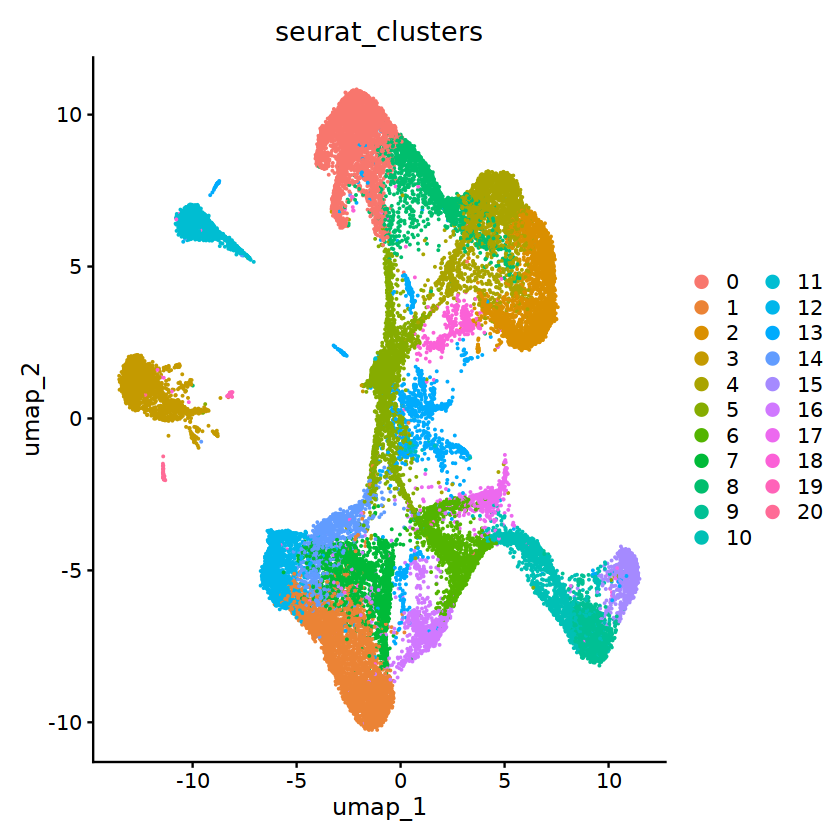

In [22]:
DimPlot(ifnb_testct_In, reduction = "umap", group.by = "seurat_clusters", 
    repel = TRUE)

In [23]:
# confusion matrix
table(ifnb_testct_In$seurat_clusters, ifnb_testct_In$predicted.id)

    
     Inh L1 ADARB2 ADAM33 Inh L1 ADARB2 DISP2 Inh L1 LAMP5 GGT8P
  0                     0                   0                  0
  1                     0                   1                  0
  2                     1                   0                  0
  3                    12                   0                  0
  4                     0                   0                  0
  5                    86                   0                  1
  6                   659                   1                  0
  7                     1                   1                  0
  8                     1                   0                  0
  9                     0                   0                 11
  10                    6                   0                  5
  11                    0                   0                  0
  12                    0                   0                  0
  13                    0                   0                  0
  14                

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <98>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <98>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '★' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

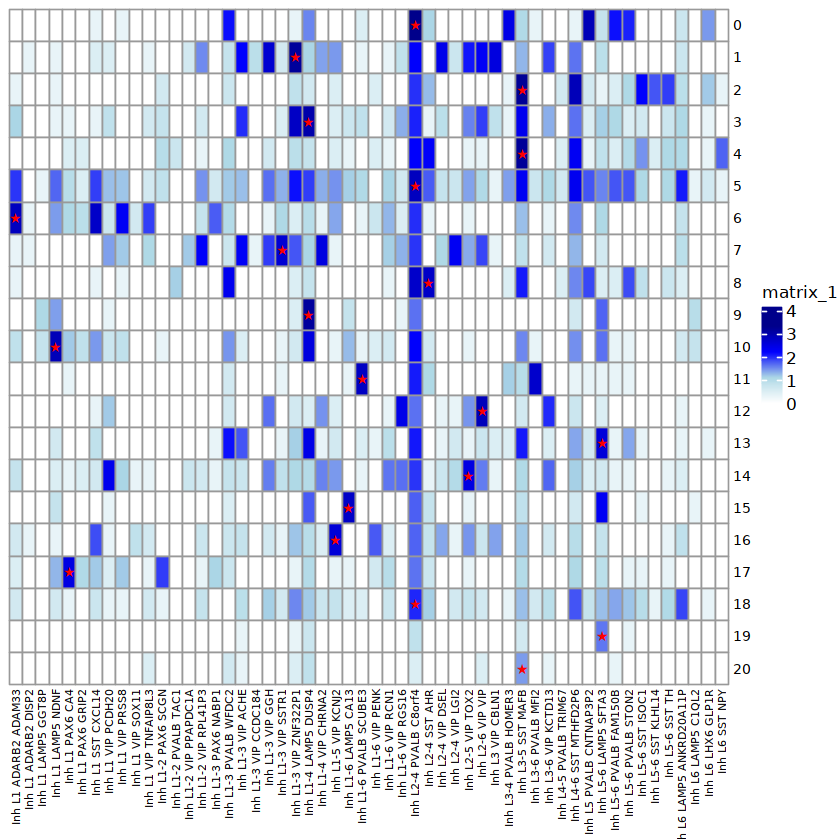

In [24]:
confusion_matrix <- table(ifnb_testct_In$seurat_clusters, ifnb_testct_In$predicted.id)
confusion_matrix <- as.matrix(confusion_matrix)

annotation_matrix <- matrix("", nrow = nrow(confusion_matrix), ncol = ncol(confusion_matrix))
# Identify the highest value in each row and mark it
for (i in 1:nrow(confusion_matrix)) {
  max_col <- which.max(confusion_matrix[i, ])
  annotation_matrix[i, max_col] <- "★"  # Use a star to highlight the highest value
}

# Plot the heatmap with annotations
pheatmap(
  log10(confusion_matrix + 1),
  cluster_rows = FALSE,  # Do not cluster rows
  cluster_cols = FALSE,  # Do not cluster columns
  color = colorRampPalette(c("white", "lightblue", "blue", "darkblue"))(100),  # Define color scale
  fontsize_row = 8,      # Adjust row font size
  fontsize_col = 6,      # Adjust column font size
  angle_col = "90",      # Rotate column labels for readability
  display_numbers = annotation_matrix,  # Add annotations
  number_color = "red"   # Highlight annotations in red
)

Can see for each of the original seurat clusters, which reference cell type is most similar as predicted.

### Examine Outlier Individuals for each disease

In [ ]:
library(dplyr)
library(stringr)
# Extract metadata from the Seurat object
metadata <- as.data.frame(ifnb_testct_In@meta.data)

# Filter the metadata for specified cell types
filtered_metadata <- metadata 

# Calculate proportions for each cell type per individual
proportion_data <- filtered_metadata %>%
  group_by(batch, predicted.id) %>%
  summarise(cell_count = n(), .groups = 'drop') %>%
  group_by(batch) %>%
  mutate(total_cells = sum(cell_count),
         proportion = cell_count / total_cells) %>%
  ungroup()

# Add disease information to the proportions
proportion_data <- proportion_data %>%
  left_join(metadata %>% distinct(batch, disease), by = "batch")

# Define custom colors
custom_colors <- c("HC" = "#00BA38", "PD" = "#F8766D", "RBD" = "#619CFF")

pdf("../../man_figs_pdf/inh_prop_CT_boxplot.pdf", width = 16, height = 8)  # Adjust width and height as needed
# Create boxplot for each disease group with custom colors
ggplot(proportion_data, aes(x = predicted.id, y = proportion, fill = disease)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 2) +  # Show outliers with default points
  scale_fill_manual(values = custom_colors) +  # Apply custom colors
  labs(title = "Proportion of Filtered Cell Types Across Disease Groups",
       x = "Cell Type",
       y = "Proportion",
       fill = "Disease Group") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels
dev.off()

png 
  2

### No outlier removal

In [ ]:
# Extract metadata
metadata <- FetchData(ifnb_testct_In, vars = c("predicted.id", "disease"))

# Calculate proportions
proportions <- metadata %>%
  group_by(disease, predicted.id) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(disease) %>%
  mutate(Proportion = Count / sum(Count))

# Print the calculated proportions
# print(proportions)
custom_colors <- c("HC" = "#00BA38", "PD" = "#F8766D", "RBD" = "#619CFF")

# Create the bar plot
pdf("../../man_figs_pdf/inh_prop_CT_barplot_w_outliers.pdf", width = 16, height = 8)
ggplot(proportions, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = custom_colors) +  # Apply custom colors
  labs(
    title = "Proportion of Cells by Cell Type and Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
dev.off()

png 
  2

In [ ]:
# Extract metadata
metadata <- FetchData(ifnb_testct_In, vars = c("predicted.id", "disease"))

# Calculate proportions
proportions <- metadata %>%
  group_by(disease, predicted.id) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(disease) %>%
  mutate(Proportion = Count / sum(Count)) %>%
  filter(
    (str_detect(predicted.id, "SST") | 
     str_detect(predicted.id, "PVALB") |
     str_detect(predicted.id, "LAMP5") |
     str_detect(predicted.id, "Inh L1 ADARB2 ADAM33") |
     str_starts(predicted.id, "Inh L1 PAX6 CA4") |
     str_starts(predicted.id, "Inh L1-3 VIP GGH")) &
     !str_detect(predicted.id, "Inh L1-2 PVALB TAC1") &
     !str_detect(predicted.id, "Inh L6 SST NPY") &
     !str_detect(predicted.id, "Inh L1-6 PVALB SCUBE3") &
     !str_detect(predicted.id, "Inh L3-6 PVALB MFI2") &
     !str_detect(predicted.id, "Inh L4-5 PVALB TRIM67") &
     !str_detect(predicted.id, "Inh L3-4 PVALB HOMER3") &
     !str_detect(predicted.id, "Inh L6 LAMP5 C1QL2")
  )

proportions$disease <- factor(proportions$disease, levels = c("HC", "RBD", "PD"))
custom_colors <- c("HC" = "#00BA38", "PD" = "#F8766D", "RBD" = "#619CFF")

# Create the bar plot
pdf("../../man_figs_pdf/inh_subset_prop_CT_barplot.pdf", width = 8, height = 8)
ggplot(proportions, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = custom_colors) +  # Apply custom colors
  labs(
    title = "Proportion of Cells by Cell Type and Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
dev.off()

pdf 
  2

# Marker gene & DEG analysis

## Marker Genes for selected subtypes

In [4]:
meta <- ifnb_testct_In@meta.data
pred_ids <- meta[["predicted.id"]]
selected_cells <- rownames(meta)[
  (
    grepl("SST", pred_ids) |
    grepl("PVALB", pred_ids) |
    grepl("LAMP5", pred_ids) |
    grepl("Inh L1 ADARB2 ADAM33", pred_ids) |
    grepl("^Inh L1 PAX6 CA4", pred_ids) |
    grepl("^Inh L1-3 VIP GGH", pred_ids)
  ) &
  !grepl("Inh L1-2 PVALB TAC1", pred_ids) &
  !grepl("Inh L6 SST NPY", pred_ids) &
  !grepl("Inh L1-6 PVALB SCUBE3", pred_ids) &
  !grepl("Inh L3-6 PVALB MFI2", pred_ids) &
  !grepl("Inh L4-5 PVALB TRIM67", pred_ids) &
  !grepl("Inh L3-4 PVALB HOMER3", pred_ids) &
  !grepl("Inh L6 LAMP5 C1QL2", pred_ids)
]

ifnb_testct_In_subset <- subset(ifnb_testct_In, cells = selected_cells)

cluster_markers <- list()  # make sure this list is initialized

Idents(ifnb_testct_In_subset) <- "predicted.id"

for (cluster in unique(ifnb_testct_In_subset$predicted.id)) {
  num_cells <- sum(ifnb_testct_In_subset$predicted.id == cluster)
  
  if (num_cells < 3) {
    message("Skipping cluster '", cluster, "' (fewer than 3 cells: ", num_cells, ")")
    next
  }

  message("Processing cluster: ", cluster)
  
  cluster_markers[[cluster]] <- FindMarkers(ifnb_testct_In_subset, ident.1 = cluster)
}

Processing cluster: Inh L1 SST CXCL14

Processing cluster: Inh L1-4 LAMP5 DUSP4

Processing cluster: Inh L3-5 SST MAFB

Processing cluster: Inh L1 PAX6 CA4

Processing cluster: Inh L2-4 PVALB C8orf4

Processing cluster: Inh L5-6 PVALB STON2

Processing cluster: Inh L1-6 LAMP5 CA13

Processing cluster: Inh L6 LAMP5 ANKRD20A11P

Processing cluster: Inh L2-4 SST AHR

Processing cluster: Inh L5 PVALB CNTNAP3P2

Processing cluster: Inh L1 LAMP5 NDNF

Processing cluster: Inh L5-6 PVALB FAM150B

Processing cluster: Inh L1-3 VIP SSTR1

Processing cluster: Inh L1 ADARB2 ADAM33

Processing cluster: Inh L4-6 SST MTHFD2P6

Processing cluster: Inh L5-6 LAMP5 SFTA3

Processing cluster: Inh L1-3 VIP GGH

Processing cluster: Inh L1-3 PVALB WFDC2

Processing cluster: Inh L5-6 SST ISOC1

Processing cluster: Inh L5-6 SST TH

Processing cluster: Inh L5-6 SST KLHL14

Processing cluster: Inh L1 LAMP5 GGT8P



In [ ]:
library(openxlsx)

# Create a new workbook
wb <- createWorkbook()

for (cluster in unique(ifnb_testct_In_subset$predicted.id)) {
    if (!(cluster %in% names(cluster_markers))) {
        next  # skip if the cluster was not included in cluster_markers
      }
    # Filter the data for each cluster
    cluster_data <- cluster_markers[[cluster]] %>% filter(p_val_adj < 0.05) %>% filter(avg_log2FC > 0.25)
    
    # Add a worksheet with the cluster name
    addWorksheet(wb, sheetName = cluster)
    
    # Write the filtered data to the worksheet
    writeData(wb, sheet = cluster, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../Annotate_Inh_Subtype/Inh_subset_cells/Marker_Genes.xlsx", overwrite = TRUE)


## DEG for selected subtypes (PD vs HC)

In [8]:
set.seed(384)

meta <- ifnb_testct_In@meta.data
pred_ids <- meta[["predicted.id"]]

selected_cells <- rownames(meta)[
  (
    grepl("SST", pred_ids) |
    grepl("PVALB", pred_ids) |
    grepl("LAMP5", pred_ids) |
    grepl("Inh L1 ADARB2 ADAM33", pred_ids) |
    grepl("^Inh L1 PAX6 CA4", pred_ids) |
    grepl("^Inh L1-3 VIP GGH", pred_ids)
  ) &
  !grepl("Inh L1-2 PVALB TAC1", pred_ids) &
  !grepl("Inh L6 SST NPY", pred_ids) &
  !grepl("Inh L1-6 PVALB SCUBE3", pred_ids) &
  !grepl("Inh L3-6 PVALB MFI2", pred_ids) &
  !grepl("Inh L4-5 PVALB TRIM67", pred_ids) &
  !grepl("Inh L3-4 PVALB HOMER3", pred_ids) &
  !grepl("Inh L6 LAMP5 C1QL2", pred_ids)
]

ifnb_testct_In_subset <- subset(ifnb_testct_In, cells = selected_cells)

deg_results_by_cluster <- list()

for (cluster in unique(ifnb_testct_In_subset$predicted.id)) {
  message("Processing cluster: ", cluster)

  cluster_cells <- rownames(ifnb_testct_In_subset@meta.data)[
    ifnb_testct_In_subset@meta.data$predicted.id == cluster
  ]
  cluster_subset <- subset(ifnb_testct_In_subset, cells = cluster_cells)

  # set identities to disease
  Idents(cluster_subset) <- "disease"

  # counts per disease
  n_PD <- sum(Idents(cluster_subset) == "PD")
  n_HC <- sum(Idents(cluster_subset) == "HC")

  if (n_PD < 3 || n_HC < 3) {
    message("  Skipping (PD=", n_PD, ", HC=", n_HC, ")")
    next
  }

  # proceed only if both diseases are present
  if (all(c("PD", "HC") %in% Idents(cluster_subset))) {
    deg_results_by_cluster[[cluster]] <-
      FindMarkers(cluster_subset, ident.1 = "PD", ident.2 = "HC")
  } else {
    message("Skipping (needs both PD and HC cells)")
  }
}

Processing cluster: Inh L1 SST CXCL14

Processing cluster: Inh L1-4 LAMP5 DUSP4

Processing cluster: Inh L3-5 SST MAFB

Processing cluster: Inh L1 PAX6 CA4

Processing cluster: Inh L2-4 PVALB C8orf4

Processing cluster: Inh L5-6 PVALB STON2

Processing cluster: Inh L1-6 LAMP5 CA13

Processing cluster: Inh L6 LAMP5 ANKRD20A11P

Processing cluster: Inh L2-4 SST AHR

Processing cluster: Inh L5 PVALB CNTNAP3P2

Processing cluster: Inh L1 LAMP5 NDNF

Processing cluster: Inh L5-6 PVALB FAM150B

Processing cluster: Inh L1-3 VIP SSTR1

Processing cluster: Inh L1 ADARB2 ADAM33

Processing cluster: Inh L4-6 SST MTHFD2P6

Processing cluster: Inh L5-6 LAMP5 SFTA3

Processing cluster: Inh L1-3 VIP GGH

Processing cluster: Inh L1-3 PVALB WFDC2

Processing cluster: Inh L5-6 SST ISOC1

Processing cluster: Inh L5-6 SST TH

Processing cluster: Inh L5-6 SST KLHL14

Processing cluster: Inh L1 LAMP5 GGT8P

  Skipping (PD=2, HC=14)



In [ ]:
library(openxlsx)
wb <- createWorkbook()

for (i in names(deg_results_by_cluster)) {
    cluster_data <- deg_results_by_cluster[[i]] %>% filter(p_val_adj < 0.05)
    
    # Add a worksheet with the cluster name
    addWorksheet(wb, sheetName = i)
    
    # Write the filtered data to the worksheet
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/DEGs_PD_vs_HC/Significant_DEGs_PD_vs_HC_Inh_subset.xlsx", overwrite = TRUE)


In [6]:
go_analysis <- function(deg_results_by_cluster, log2FC_threshold = 0.0, abs = TRUE){
    set.seed(384)
    # Define the database(s) to use for EnrichR, focusing on GO Biological Process
    dbs <- c("GO_Biological_Process_2021")
    
    # Initialize a list to store enrichment results
    enrichment_results <- list()
    marker_counts <- list() 
    
    # Loop over each cluster in deg_results_by_cluster to perform enrichment analysis
    for (cluster_name in names(deg_results_by_cluster)) {
      # print(cluster_name)
      # Retrieve DEGs for the current cluster from deg_results_by_cluster
      cluster_data <- deg_results_by_cluster[[cluster_name]]
      
      # Select significant DEGs (e.g., adjusted p-value < 0.05 and log fold change threshold)
      if (abs == TRUE){
          significant_genes <- rownames(cluster_data[cluster_data$p_val_adj < 0.05 & abs(cluster_data$avg_log2FC) > log2FC_threshold, ])
      }else{
          significant_genes <- rownames(cluster_data[cluster_data$p_val_adj < 0.05 & cluster_data$avg_log2FC > log2FC_threshold, ])
      }
      # print(significant_genes)
      marker_counts[[cluster_name]] <- length(significant_genes)
        
      # Perform enrichment analysis if there are significant genes
      if (length(significant_genes) > 0) {
        enrich_result <- enrichr(significant_genes, dbs)
        go_results <- enrich_result[["GO_Biological_Process_2021"]]
        
        # Sort results by adjusted p-value and select the top 10 processes
        go_results <- go_results[order(go_results$Adjusted.P.value), ]
        top_processes <- head(go_results, 10)
    
        if (nrow(top_processes) != 0) {
            # Initialize list to store the average fold change for each GO term
            avg_fc_for_terms <- numeric(nrow(top_processes))
            
            # Calculate the average fold change for each GO term in top_processes
            for (j in 1:nrow(top_processes)) {
              if (!is.na(top_processes$Genes[j]) && top_processes$Genes[j] != "") {
                genes_in_term <- strsplit(as.character(top_processes$Genes[j]), ";")[[1]]  # Split the genes string by semicolon
                
                # Only keep genes that are present in cluster_data
                genes_in_term <- genes_in_term[genes_in_term %in% rownames(cluster_data)]
                  
                # Retrieve fold changes for these genes
                if (length(genes_in_term) > 0) {
                  fc_values <- cluster_data[genes_in_term, "avg_log2FC"]
                  avg_fc_for_terms[j] <- mean(fc_values, na.rm = TRUE)  # Calculate the average, ignoring NA values
                } else {
                  avg_fc_for_terms[j] <- NA  # If no genes are found, set to NA
                }
              } else {
                avg_fc_for_terms[j] <- NA  # If 'Genes' is NA, set to NA
              }
            }
        
            # Add the average fold changes as a new column in top_processes
            top_processes$Avg_Log2FC <- avg_fc_for_terms
        }
        # Store the top GO processes for this cluster
        enrichment_results[[cluster_name]] <- top_processes
      }
    }
    return(list(marker_counts = marker_counts, enrichment_results = enrichment_results))
}

In [8]:
set.seed(384)
output <- go_analysis(deg_results_by_cluster, log2FC_threshold = 0.25)
list2env(output, envir = .GlobalEnv)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

<environment: R_GlobalEnv>

In [9]:
marker_counts

$`Inh L1 SST CXCL14`
[1] 9

$`Inh L1-4 LAMP5 DUSP4`
[1] 1836

$`Inh L3-5 SST MAFB`
[1] 295

$`Inh L1 PAX6 CA4`
[1] 7

$`Inh L2-4 PVALB C8orf4`
[1] 404

$`Inh L5-6 PVALB STON2`
[1] 1

$`Inh L1-6 LAMP5 CA13`
[1] 13

$`Inh L6 LAMP5 ANKRD20A11P`
[1] 0

$`Inh L2-4 SST AHR`
[1] 14

$`Inh L5 PVALB CNTNAP3P2`
[1] 7

$`Inh L1 LAMP5 NDNF`
[1] 67

$`Inh L5-6 PVALB FAM150B`
[1] 0

$`Inh L1-3 VIP SSTR1`
[1] 14

$`Inh L1 ADARB2 ADAM33`
[1] 25

$`Inh L4-6 SST MTHFD2P6`
[1] 6

$`Inh L5-6 LAMP5 SFTA3`
[1] 23

$`Inh L1-3 VIP GGH`
[1] 12

$`Inh L1-3 PVALB WFDC2`
[1] 7

$`Inh L5-6 SST ISOC1`
[1] 1

$`Inh L5-6 SST TH`
[1] 0

$`Inh L5-6 SST KLHL14`
[1] 0

In [10]:
nonzero_names <- names(marker_counts)[unlist(marker_counts) > 0]
nonzero_names

[1] "Inh L1 SST CXCL14"      "Inh L1-4 LAMP5 DUSP4"   "Inh L3-5 SST MAFB"     
 [4] "Inh L1 PAX6 CA4"        "Inh L2-4 PVALB C8orf4"  "Inh L5-6 PVALB STON2"  
 [7] "Inh L1-6 LAMP5 CA13"    "Inh L2-4 SST AHR"       "Inh L5 PVALB CNTNAP3P2"
[10] "Inh L1 LAMP5 NDNF"      "Inh L1-3 VIP SSTR1"     "Inh L1 ADARB2 ADAM33"  
[13] "Inh L4-6 SST MTHFD2P6"  "Inh L5-6 LAMP5 SFTA3"   "Inh L1-3 VIP GGH"      
[16] "Inh L1-3 PVALB WFDC2"   "Inh L5-6 SST ISOC1"

In [ ]:
library(openxlsx)
wb <- createWorkbook()
for (i in nonzero_names) {
    cluster_data <- enrichment_results[[i]]
    addWorksheet(wb, sheetName = i)
    
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/GO_PD_vs_HC/GO_Results_PD_vs_HC_Inh_subset.xlsx", overwrite = TRUE)
saveRDS(enrichment_results, "../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_Inh_subset.rds")

In [ ]:
# enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_RORB.rds")
set.seed(384) 
# Prepare matrices for plotting
# Step 1: Restrict enrichment_results to top 5 rows (per subtype)
top5_results <- lapply(enrichment_results, function(df) {
  if (!is.null(df) && nrow(df) > 0) {
    return(df[1:min(5, nrow(df)), ])
  } else {
    return(NULL)
  }
})

# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(top5_results, function(x) x$Term)))
                             
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                            dimnames = list(all_processes, nonzero_names))
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                    dimnames = list(all_processes, nonzero_names))

# Fill the matrices with -log10(adjusted p-value) and Avg_Log2FC for each process and cluster
for (cluster_name in nonzero_names) {
  cluster_df <- top5_results[[cluster_name]]
  if (!is.null(cluster_df) && nrow(cluster_df) > 0) {
    for (j in 1:nrow(cluster_df)) {
      process <- cluster_df$Term[j]
      pval <- cluster_df$Adjusted.P.value[j]
      avg_log2fc <- cluster_df$Avg_Log2FC[j]
      
      enrichment_matrix[process, cluster_name] <- -log10(pval)
      fc_matrix[process, cluster_name] <- avg_log2fc
    }
  }
}

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_PDvsHC_logp.pdf"
# Plot the heatmap using pheatmap
pheatmap::pheatmap(enrichment_matrix,
                   color = c(
                     colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                     colorRampPalette(c('#ef3b2c','#cb181d','#a50f15','#67000d'))(90) # High contrast for larger values
                   ),
                   na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value)",
                   cluster_rows = FALSE,       # Cluster processes for better visualization
                   cluster_cols = FALSE,      # Do not cluster clusters (retain the original order)
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Font size for cluster labels
print("Logp Plot saved")

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_PDvsHC_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = FALSE,          # Cluster processes for better visualization
                   cluster_cols = FALSE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("Log2FC File saved")                                                  

[1] "Logp Plot saved"
[1] "Log2FC File saved"


#### GO with just positive DEGs

In [7]:
set.seed(384)
output <- go_analysis(deg_results_by_cluster, log2FC_threshold = 0.25, abs = FALSE)
list2env(output, envir = .GlobalEnv)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

<environment: R_GlobalEnv>

In [8]:
marker_counts

$`Inh L1 SST CXCL14`
[1] 7

$`Inh L1-4 LAMP5 DUSP4`
[1] 1245

$`Inh L3-5 SST MAFB`
[1] 148

$`Inh L1 PAX6 CA4`
[1] 5

$`Inh L2-4 PVALB C8orf4`
[1] 85

$`Inh L5-6 PVALB STON2`
[1] 0

$`Inh L1-6 LAMP5 CA13`
[1] 10

$`Inh L6 LAMP5 ANKRD20A11P`
[1] 0

$`Inh L2-4 SST AHR`
[1] 9

$`Inh L5 PVALB CNTNAP3P2`
[1] 4

$`Inh L1 LAMP5 NDNF`
[1] 63

$`Inh L5-6 PVALB FAM150B`
[1] 0

$`Inh L1-3 VIP SSTR1`
[1] 11

$`Inh L1 ADARB2 ADAM33`
[1] 22

$`Inh L4-6 SST MTHFD2P6`
[1] 4

$`Inh L5-6 LAMP5 SFTA3`
[1] 19

$`Inh L1-3 VIP GGH`
[1] 10

$`Inh L1-3 PVALB WFDC2`
[1] 4

$`Inh L5-6 SST ISOC1`
[1] 0

$`Inh L5-6 SST TH`
[1] 0

$`Inh L5-6 SST KLHL14`
[1] 0

In [9]:
nonzero_names <- names(marker_counts)[unlist(marker_counts) > 0]
nonzero_names

[1] "Inh L1 SST CXCL14"      "Inh L1-4 LAMP5 DUSP4"   "Inh L3-5 SST MAFB"     
 [4] "Inh L1 PAX6 CA4"        "Inh L2-4 PVALB C8orf4"  "Inh L1-6 LAMP5 CA13"   
 [7] "Inh L2-4 SST AHR"       "Inh L5 PVALB CNTNAP3P2" "Inh L1 LAMP5 NDNF"     
[10] "Inh L1-3 VIP SSTR1"     "Inh L1 ADARB2 ADAM33"   "Inh L4-6 SST MTHFD2P6" 
[13] "Inh L5-6 LAMP5 SFTA3"   "Inh L1-3 VIP GGH"       "Inh L1-3 PVALB WFDC2"

In [ ]:
library(openxlsx)
wb <- createWorkbook()
for (i in nonzero_names) {
    cluster_data <- enrichment_results[[i]]
    addWorksheet(wb, sheetName = i)
    
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/GO_PD_vs_HC/GO_Results_PD_vs_HC_Inh_subset_+.xlsx", overwrite = TRUE)
saveRDS(enrichment_results, "../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_Inh_subset_+.rds")

In [ ]:
# enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_RORB.rds")
set.seed(384) 
# Prepare matrices for plotting
# Step 1: Restrict enrichment_results to top 5 rows (per subtype)
top5_results <- lapply(enrichment_results, function(df) {
  if (!is.null(df) && nrow(df) > 0) {
    return(df[1:min(5, nrow(df)), ])
  } else {
    return(NULL)
  }
})

# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(top5_results, function(x) x$Term)))
                             
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                            dimnames = list(all_processes, nonzero_names))
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                    dimnames = list(all_processes, nonzero_names))

# Fill the matrices with -log10(adjusted p-value) and Avg_Log2FC for each process and cluster
for (cluster_name in nonzero_names) {
  cluster_df <- top5_results[[cluster_name]]
  if (!is.null(cluster_df) && nrow(cluster_df) > 0) {
    for (j in 1:nrow(cluster_df)) {
      process <- cluster_df$Term[j]
      pval <- cluster_df$Adjusted.P.value[j]
      avg_log2fc <- cluster_df$Avg_Log2FC[j]
      
      enrichment_matrix[process, cluster_name] <- -log10(pval)
      fc_matrix[process, cluster_name] <- avg_log2fc
    }
  }
}

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_PDvsHC_logp_+.pdf"
# Plot the heatmap using pheatmap
pheatmap::pheatmap(enrichment_matrix,
                   color = c(
                     colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                     colorRampPalette(c('#ef3b2c','#cb181d','#a50f15','#67000d'))(90) # High contrast for larger values
                   ),
                   na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value)",
                   cluster_rows = FALSE,       # Cluster processes for better visualization
                   cluster_cols = FALSE,      # Do not cluster clusters (retain the original order)
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Font size for cluster labels
print("Logp Plot saved")

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_PDvsHC_log2fc_+.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = FALSE,          # Cluster processes for better visualization
                   cluster_cols = FALSE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("Log2FC File saved")                                                  

[1] "Logp Plot saved"
[1] "Log2FC File saved"


#### DEG heatmap

In [ ]:
library(openxlsx)

# Define the path to the Excel file
file_path <- "../../DEG_GO_Analysis/DEGs_PD_vs_HC/Significant_DEGs_PD_vs_HC_Inh_subset.xlsx"

# Get sheet names (these correspond to cluster names)
sheet_names <- getSheetNames(file_path)

# Read each sheet into a named list
deg_results_by_cluster <- lapply(sheet_names, function(sheet) {
  read.xlsx(file_path, sheet = sheet, rowNames = TRUE)
})
names(deg_results_by_cluster) <- sheet_names

In [27]:
top10_tables <- list()

for (cell_type in sort(names(deg_results_by_cluster)) {
  cat("\nTop 10/20 genes for subtype:", cell_type, "\n")
  
  # Get the dataframe
  df <- deg_results_by_cluster[[cell_type]] %>% filter(p_val_adj < 0.05)
    
  # Add gene names as a column if they're rownames
  df$gene <- rownames(df)
    
  df <- df[!grepl("^(LINC)", df$gene), ]
  df <- df[!grepl("-AS1$", df$gene), ]
  df <- df[!grepl("^(NPIPA8|TTTY)", df$gene), ]
  df <- df[!grepl("^(MT-)", df$gene), ]
  df <- df[!grepl("\\.\\d+$", df$gene), ]
  exclude_genes <- c(
          "XIST", "FTX", "USP9Y", "NLGN4Y", "UTY", 
          "KDM5D", "PCDH11Y", "PLCG2", "ANOS1", "TSIX", "JPX", "SLC4A7", "HSP90AA1", "MACROD2"
        )
  df <- df[!df$gene %in% exclude_genes, ]
    
  df <- df %>% filter(pct.1 >= 0.25 | pct.2 >= 0.25)
  
  # Select top 10 genes with highest avg_log2FC
  top_genes <- df[order(-df$avg_log2FC), ][1:3, ]

  # Save to list
  top10_tables[[cell_type]] <- top_genes
  
  # Optionally print the top genes
  print(top_genes)
}


Top 10/20 genes for subtype: Inh L1 ADARB2 ADAM33 
               p_val avg_log2FC pct.1 pct.2    p_val_adj    gene
LYPD6   2.491647e-07  1.2161804 0.305 0.128 9.119676e-03   LYPD6
CALN1   3.340505e-12  1.0656433 0.610 0.306 1.222658e-07   CALN1
CFAP161 1.024747e-08  0.8642808 0.486 0.239 3.750677e-04 CFAP161

Top 10/20 genes for subtype: Inh L1 LAMP5 NDNF 
              p_val avg_log2FC pct.1 pct.2    p_val_adj   gene
DNAJA1 9.757255e-11  1.3238931 0.349 0.130 3.571253e-06 DNAJA1
TIMM23 1.110674e-06  1.1741012 0.259 0.109 4.065177e-02 TIMM23
DIRC3  1.838206e-08  0.9753085 0.519 0.285 6.728016e-04  DIRC3

Top 10/20 genes for subtype: Inh L1 PAX6 CA4 
     p_val avg_log2FC pct.1 pct.2 p_val_adj gene
NA      NA         NA    NA    NA        NA <NA>
NA.1    NA         NA    NA    NA        NA <NA>
NA.2    NA         NA    NA    NA        NA <NA>

Top 10/20 genes for subtype: Inh L1 SST CXCL14 
              p_val avg_log2FC pct.1 pct.2    p_val_adj   gene
RBFOX1 2.768408e-09  0.7542656 0

In [ ]:
# Top genes in your custom order
all_top_genes <- unique(unlist(lapply(top10_tables, function(df) df$gene)))
all_top_genes <- all_top_genes[!is.na(all_top_genes) & all_top_genes != ""]

# Column set (predicted.id) we'll keep, in a fixed alphabetical order
cell_types <- sort(names(top10_tables))
                         
# ---- Compute pooled (HC + RBD) reference for z-scoring ----
pooled_cells <- rownames(ifnb_testct_In_subset@meta.data)[
  ifnb_testct_In_subset@meta.data$disease %in% c("HC","PD")
]
obj_pooled <- subset(ifnb_testct_In_subset, cells = pooled_cells)

grp <- interaction(
  obj_pooled@meta.data$disease,
  obj_pooled@meta.data$predicted.id,
  drop = TRUE
)
obj_pooled@meta.data$dz_pid <- grp

avg_pooled_list <- AverageExpression(
  object   = obj_pooled,
  features = all_top_genes,
  group.by = "dz_pid",
  assays   = "RNA",
  slot     = "data"
)
avg_pooled <- avg_pooled_list$RNA
avg_pooled <- avg_pooled[all_top_genes, , drop = FALSE]

pooled_mean <- rowMeans(avg_pooled, na.rm = TRUE)
pooled_sd   <- apply(avg_pooled, 1, sd, na.rm = TRUE)
pooled_sd[pooled_sd == 0 | is.na(pooled_sd)] <- 1

# Precompute z-scored pooled matrix for setting global limits
pooled_scaled <- sweep(avg_pooled, 1, pooled_mean, "-")
pooled_scaled <- sweep(pooled_scaled, 1, pooled_sd, "/")

# Global limits for color scale
z_min <- -3
z_max <- 3
breaks <- seq(z_min, z_max, length.out = 101)

custom_palette <- c('#2166ac','#92c5de','#f7f7f7','#f4a582','#b2182b')
col_fun <- colorRampPalette(custom_palette)(length(breaks)-1)

# ---- Loop per disease, apply pooled scaling and fixed color scale ----
diseases <- c("HC","PD")

for (dz in diseases) {
  cells_dz <- rownames(ifnb_testct_In_subset@meta.data)[
    ifnb_testct_In_subset@meta.data$disease %in% dz
  ]
  if (length(cells_dz) == 0) {
    message(sprintf("No cells for disease = %s; skipping.", dz))
    next
  }
  obj_dz <- subset(ifnb_testct_In_subset, cells = cells_dz)

  avg_exp_list <- AverageExpression(
    object   = obj_dz,
    features = all_top_genes,
    group.by = "predicted.id",
    assays   = "RNA",
    slot     = "data"
  )
  avg_exp_matrix <- avg_exp_list$RNA
  avg_exp_matrix <- avg_exp_matrix[all_top_genes, , drop = FALSE]

  keep_cols <- intersect(cell_types, colnames(avg_exp_matrix))
  if (length(keep_cols) == 0) {
    message(sprintf("No matching predicted.id columns for disease = %s; skipping.", dz))
    next
  }
  avg_exp_matrix <- avg_exp_matrix[, keep_cols, drop = FALSE]

  # Apply pooled z-scaling
  scaled_matrix <- sweep(avg_exp_matrix, 1, pooled_mean, "-")
  scaled_matrix <- sweep(scaled_matrix, 1, pooled_sd, "/")
  scaled_matrix[!is.finite(scaled_matrix)] <- 0

  # Plot with fixed breaks/limits
  out_file <- sprintf("../../man_figs_pdf/inh_subset_pd_hc_pooledZ_%s.pdf", dz)
  pheatmap::pheatmap(
    mat           = scaled_matrix,
    color         = col_fun,
    breaks        = breaks,
    cluster_rows  = FALSE,
    cluster_cols  = FALSE,
    fontsize_row  = 8,
    fontsize_col  = 10,
    angle_col     = 90,
    main          = sprintf("Average Expression (pooled z-score) - RORB L4-5 - %s", dz),
    filename      = out_file
  )
  message(sprintf("Saved: %s", out_file))
}

message("Done: same pooled z-score scaling and fixed color limits across HC and PD heatmaps.")

Saved: ../man_figs_pdf/inh_subset_pd_hc_pooledZ_HC.pdf

Saved: ../man_figs_pdf/inh_subset_pd_hc_pooledZ_PD.pdf

Done: same pooled z-score scaling and fixed color limits across HC and PD heatmaps.



## DEG with selected subtypes (RBD vs HC)

In [21]:
set.seed(384)

meta <- ifnb_testct_In@meta.data
pred_ids <- meta[["predicted.id"]]

selected_cells <- rownames(meta)[
  (
    grepl("SST", pred_ids) |
    grepl("PVALB", pred_ids) |
    grepl("LAMP5", pred_ids) |
    grepl("Inh L1 ADARB2 ADAM33", pred_ids) |
    grepl("^Inh L1 PAX6 CA4", pred_ids) |
    grepl("^Inh L1-3 VIP GGH", pred_ids)
  ) &
  !grepl("Inh L1-2 PVALB TAC1", pred_ids) &
  !grepl("Inh L6 SST NPY", pred_ids) &
  !grepl("Inh L1-6 PVALB SCUBE3", pred_ids) &
  !grepl("Inh L3-6 PVALB MFI2", pred_ids) &
  !grepl("Inh L4-5 PVALB TRIM67", pred_ids) &
  !grepl("Inh L3-4 PVALB HOMER3", pred_ids) &
  !grepl("Inh L6 LAMP5 C1QL2", pred_ids)
]

ifnb_testct_In_subset <- subset(ifnb_testct_In, cells = selected_cells)

deg_results_by_cluster <- list()

for (cluster in unique(ifnb_testct_In_subset$predicted.id)) {
  message("Processing cluster: ", cluster)

  cluster_cells <- rownames(ifnb_testct_In_subset@meta.data)[
    ifnb_testct_In_subset@meta.data$predicted.id == cluster
  ]
  cluster_subset <- subset(ifnb_testct_In_subset, cells = cluster_cells)

  # set identities to disease
  Idents(cluster_subset) <- "disease"

  # counts per disease
  n_RBD <- sum(Idents(cluster_subset) == "RBD")
  n_HC <- sum(Idents(cluster_subset) == "HC")

  if (n_RBD < 3 || n_HC < 3) {
    message("  Skipping (RBD=", n_RBD, ", HC=", n_HC, ")")
    next
  }

  # proceed only if both diseases are present
  if (all(c("RBD", "HC") %in% Idents(cluster_subset))) {
    deg_results_by_cluster[[cluster]] <-
      FindMarkers(cluster_subset, ident.1 = "RBD", ident.2 = "HC")
  } else {
    message("Skipping (needs both RBD and HC cells)")
  }
}

Processing cluster: Inh L1 SST CXCL14

Processing cluster: Inh L1-4 LAMP5 DUSP4

Processing cluster: Inh L3-5 SST MAFB

Processing cluster: Inh L1 PAX6 CA4

Processing cluster: Inh L2-4 PVALB C8orf4

Processing cluster: Inh L5-6 PVALB STON2

Processing cluster: Inh L1-6 LAMP5 CA13

Processing cluster: Inh L6 LAMP5 ANKRD20A11P

Processing cluster: Inh L2-4 SST AHR

Processing cluster: Inh L5 PVALB CNTNAP3P2

Processing cluster: Inh L1 LAMP5 NDNF

Processing cluster: Inh L5-6 PVALB FAM150B

Processing cluster: Inh L1-3 VIP SSTR1

Processing cluster: Inh L1 ADARB2 ADAM33

Processing cluster: Inh L4-6 SST MTHFD2P6

Processing cluster: Inh L5-6 LAMP5 SFTA3

Processing cluster: Inh L1-3 VIP GGH

Processing cluster: Inh L1-3 PVALB WFDC2

Processing cluster: Inh L5-6 SST ISOC1

Processing cluster: Inh L5-6 SST TH

Processing cluster: Inh L5-6 SST KLHL14

Processing cluster: Inh L1 LAMP5 GGT8P

  Skipping (RBD=1, HC=14)



In [ ]:
library(openxlsx)
wb <- createWorkbook()

for (i in names(deg_results_by_cluster)) {
    cluster_data <- deg_results_by_cluster[[i]] %>% filter(p_val_adj < 0.05)
    
    # Add a worksheet with the cluster name
    addWorksheet(wb, sheetName = i)
    
    # Write the filtered data to the worksheet
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/DEGs_RBD_vs_HC/Significant_DEGs_RBD_vs_HC_Inh_subset.xlsx", overwrite = TRUE)


In [20]:
set.seed(384)
output <- go_analysis(deg_results_by_cluster, log2FC_threshold = 0.25)
list2env(output, envir = .GlobalEnv)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

<environment: R_GlobalEnv>

In [21]:
marker_counts

$`Inh L1 SST CXCL14`
[1] 9

$`Inh L1-4 LAMP5 DUSP4`
[1] 1000

$`Inh L3-5 SST MAFB`
[1] 770

$`Inh L1 PAX6 CA4`
[1] 8

$`Inh L2-4 PVALB C8orf4`
[1] 388

$`Inh L5-6 PVALB STON2`
[1] 20

$`Inh L1-6 LAMP5 CA13`
[1] 14

$`Inh L6 LAMP5 ANKRD20A11P`
[1] 50

$`Inh L2-4 SST AHR`
[1] 15

$`Inh L5 PVALB CNTNAP3P2`
[1] 49

$`Inh L1 LAMP5 NDNF`
[1] 20

$`Inh L5-6 PVALB FAM150B`
[1] 92

$`Inh L1-3 VIP SSTR1`
[1] 14

$`Inh L1 ADARB2 ADAM33`
[1] 11

$`Inh L4-6 SST MTHFD2P6`
[1] 83

$`Inh L5-6 LAMP5 SFTA3`
[1] 195

$`Inh L1-3 VIP GGH`
[1] 13

$`Inh L1-3 PVALB WFDC2`
[1] 8

$`Inh L5-6 SST ISOC1`
[1] 11

$`Inh L5-6 SST TH`
[1] 1

$`Inh L5-6 SST KLHL14`
[1] 0

In [22]:
nonzero_names <- names(marker_counts)[unlist(marker_counts) > 0]
nonzero_names

[1] "Inh L1 SST CXCL14"        "Inh L1-4 LAMP5 DUSP4"    
 [3] "Inh L3-5 SST MAFB"        "Inh L1 PAX6 CA4"         
 [5] "Inh L2-4 PVALB C8orf4"    "Inh L5-6 PVALB STON2"    
 [7] "Inh L1-6 LAMP5 CA13"      "Inh L6 LAMP5 ANKRD20A11P"
 [9] "Inh L2-4 SST AHR"         "Inh L5 PVALB CNTNAP3P2"  
[11] "Inh L1 LAMP5 NDNF"        "Inh L5-6 PVALB FAM150B"  
[13] "Inh L1-3 VIP SSTR1"       "Inh L1 ADARB2 ADAM33"    
[15] "Inh L4-6 SST MTHFD2P6"    "Inh L5-6 LAMP5 SFTA3"    
[17] "Inh L1-3 VIP GGH"         "Inh L1-3 PVALB WFDC2"    
[19] "Inh L5-6 SST ISOC1"       "Inh L5-6 SST TH"

In [ ]:
library(openxlsx)
wb <- createWorkbook()
for (i in nonzero_names) {
    cluster_data <- enrichment_results[[i]]
    addWorksheet(wb, sheetName = i)
    
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/GO_RBD_vs_HC/GO_Results_RBD_vs_HC_Inh_subset.xlsx", overwrite = TRUE)
saveRDS(enrichment_results, "../../DEG_GO_Analysis/GO_RBD_vs_HC/cached_enrichment_results_Inh_subset.rds")

In [ ]:
# enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_RORB.rds")
set.seed(384) 
# Prepare matrices for plotting
# Step 1: Restrict enrichment_results to top 5 rows (per subtype)
top5_results <- lapply(enrichment_results, function(df) {
  if (!is.null(df) && nrow(df) > 0) {
    return(df[1:min(5, nrow(df)), ])
  } else {
    return(NULL)
  }
})

# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(top5_results, function(x) x$Term)))
                             
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                            dimnames = list(all_processes, nonzero_names))
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                    dimnames = list(all_processes, nonzero_names))

# Fill the matrices with -log10(adjusted p-value) and Avg_Log2FC for each process and cluster
for (cluster_name in nonzero_names) {
  cluster_df <- top5_results[[cluster_name]]
  if (!is.null(cluster_df) && nrow(cluster_df) > 0) {
    for (j in 1:nrow(cluster_df)) {
      process <- cluster_df$Term[j]
      pval <- cluster_df$Adjusted.P.value[j]
      avg_log2fc <- cluster_df$Avg_Log2FC[j]
      
      enrichment_matrix[process, cluster_name] <- -log10(pval)
      fc_matrix[process, cluster_name] <- avg_log2fc
    }
  }
}

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_RBDvsHC_logp.pdf"
# Plot the heatmap using pheatmap
pheatmap::pheatmap(enrichment_matrix,
                   color = c(
                     colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                     colorRampPalette(c('#ef3b2c','#cb181d','#a50f15','#67000d'))(90) # High contrast for larger values
                   ),
                   na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value)",
                   cluster_rows = FALSE,       # Cluster processes for better visualization
                   cluster_cols = FALSE,      # Do not cluster clusters (retain the original order)
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Font size for cluster labels
print("Logp Plot saved")

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_RBDvsHC_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = FALSE,          # Cluster processes for better visualization
                   cluster_cols = FALSE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("Log2FC File saved")                                                  

[1] "Logp Plot saved"
[1] "Log2FC File saved"


#### GO with positive genes

In [22]:
set.seed(384)
output <- go_analysis(deg_results_by_cluster, log2FC_threshold = 0.25, abs = FALSE)
list2env(output, envir = .GlobalEnv)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

<environment: R_GlobalEnv>

In [23]:
marker_counts

$`Inh L1 SST CXCL14`
[1] 7

$`Inh L1-4 LAMP5 DUSP4`
[1] 745

$`Inh L3-5 SST MAFB`
[1] 696

$`Inh L1 PAX6 CA4`
[1] 6

$`Inh L2-4 PVALB C8orf4`
[1] 159

$`Inh L5-6 PVALB STON2`
[1] 10

$`Inh L1-6 LAMP5 CA13`
[1] 11

$`Inh L6 LAMP5 ANKRD20A11P`
[1] 10

$`Inh L2-4 SST AHR`
[1] 12

$`Inh L5 PVALB CNTNAP3P2`
[1] 22

$`Inh L1 LAMP5 NDNF`
[1] 13

$`Inh L5-6 PVALB FAM150B`
[1] 21

$`Inh L1-3 VIP SSTR1`
[1] 11

$`Inh L1 ADARB2 ADAM33`
[1] 6

$`Inh L4-6 SST MTHFD2P6`
[1] 48

$`Inh L5-6 LAMP5 SFTA3`
[1] 18

$`Inh L1-3 VIP GGH`
[1] 11

$`Inh L1-3 PVALB WFDC2`
[1] 7

$`Inh L5-6 SST ISOC1`
[1] 6

$`Inh L5-6 SST TH`
[1] 0

$`Inh L5-6 SST KLHL14`
[1] 0

In [24]:
nonzero_names <- names(marker_counts)[unlist(marker_counts) > 0]
nonzero_names

[1] "Inh L1 SST CXCL14"        "Inh L1-4 LAMP5 DUSP4"    
 [3] "Inh L3-5 SST MAFB"        "Inh L1 PAX6 CA4"         
 [5] "Inh L2-4 PVALB C8orf4"    "Inh L5-6 PVALB STON2"    
 [7] "Inh L1-6 LAMP5 CA13"      "Inh L6 LAMP5 ANKRD20A11P"
 [9] "Inh L2-4 SST AHR"         "Inh L5 PVALB CNTNAP3P2"  
[11] "Inh L1 LAMP5 NDNF"        "Inh L5-6 PVALB FAM150B"  
[13] "Inh L1-3 VIP SSTR1"       "Inh L1 ADARB2 ADAM33"    
[15] "Inh L4-6 SST MTHFD2P6"    "Inh L5-6 LAMP5 SFTA3"    
[17] "Inh L1-3 VIP GGH"         "Inh L1-3 PVALB WFDC2"    
[19] "Inh L5-6 SST ISOC1"

In [ ]:
library(openxlsx)
wb <- createWorkbook()
for (i in nonzero_names) {
    cluster_data <- enrichment_results[[i]]
    addWorksheet(wb, sheetName = i)
    
    writeData(wb, sheet = i, cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/GO_RBD_vs_HC/GO_Results_RBD_vs_HC_Inh_subset_+.xlsx", overwrite = TRUE)
saveRDS(enrichment_results, "../../DEG_GO_Analysis/GO_RBD_vs_HC/cached_enrichment_results_Inh_subset_+.rds")

In [ ]:
# enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results_RORB.rds")
set.seed(384) 
# Prepare matrices for plotting
# Step 1: Restrict enrichment_results to top 5 rows (per subtype)
top5_results <- lapply(enrichment_results, function(df) {
  if (!is.null(df) && nrow(df) > 0) {
    return(df[1:min(5, nrow(df)), ])
  } else {
    return(NULL)
  }
})

# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(top5_results, function(x) x$Term)))
                             
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                            dimnames = list(all_processes, nonzero_names))
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(nonzero_names),
                    dimnames = list(all_processes, nonzero_names))

# Fill the matrices with -log10(adjusted p-value) and Avg_Log2FC for each process and cluster
for (cluster_name in nonzero_names) {
  cluster_df <- top5_results[[cluster_name]]
  if (!is.null(cluster_df) && nrow(cluster_df) > 0) {
    for (j in 1:nrow(cluster_df)) {
      process <- cluster_df$Term[j]
      pval <- cluster_df$Adjusted.P.value[j]
      avg_log2fc <- cluster_df$Avg_Log2FC[j]
      
      enrichment_matrix[process, cluster_name] <- -log10(pval)
      fc_matrix[process, cluster_name] <- avg_log2fc
    }
  }
}

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_RBDvsHC_logp_+.pdf"
# Plot the heatmap using pheatmap
pheatmap::pheatmap(enrichment_matrix,
                   color = c(
                     colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                     colorRampPalette(c('#ef3b2c','#cb181d','#a50f15','#67000d'))(90) # High contrast for larger values
                   ),
                   na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value)",
                   cluster_rows = FALSE,       # Cluster processes for better visualization
                   cluster_cols = FALSE,      # Do not cluster clusters (retain the original order)
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Font size for cluster labels
print("Logp Plot saved")

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/inh_subset_deg_go_RBDvsHC_log2fc_+.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = FALSE,          # Cluster processes for better visualization
                   cluster_cols = FALSE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("Log2FC File saved")                                                  

[1] "Logp Plot saved"
[1] "Log2FC File saved"


#### DEG heatmap

In [ ]:
library(openxlsx)

# Define the path to the Excel file
file_path <- "../../DEG_GO_Analysis/DEGs_RBD_vs_HC/Significant_DEGs_RBD_vs_HC_Inh_subset.xlsx"

# Get sheet names (these correspond to cluster names)
sheet_names <- getSheetNames(file_path)

# Read each sheet into a named list
deg_results_by_cluster <- lapply(sheet_names, function(sheet) {
  read.xlsx(file_path, sheet = sheet, rowNames = TRUE)
})
names(deg_results_by_cluster) <- sheet_names

In [30]:
top10_tables <- list()

for (cell_type in sort(names(deg_results_by_cluster))) {
  cat("\nTop 10/20 genes for subtype:", cell_type, "\n")
  
  # Get the dataframe
  df <- deg_results_by_cluster[[cell_type]] %>% filter(p_val_adj < 0.05)
    
  # Add gene names as a column if they're rownames
  df$gene <- rownames(df)
    
  df <- df[!grepl("^(LINC)", df$gene), ]
  df <- df[!grepl("^(NPIPA8|TTTY)", df$gene), ]
  df <- df[!grepl("^(MT-)", df$gene), ]
  df <- df[!grepl("\\.\\d+$", df$gene), ]
  df <- df[!grepl("-AS1$", df$gene), ]
  exclude_genes <- c(
          "XIST", "MYRFL", "MLIP", "FTX", "USP9Y", "NLGN4Y", "UTY", 
          "KDM5D", "PCDH11Y", "PLCG2", "ANOS1", "TSIX", "JPX", "SLC4A7", 
      "HSP90AA1", "MACROD2", "ZFY", "SOX6", "CADM2", "FSTL5", "ADGRL3", "ARL17B",
      "KAZN", "CCDC144A", "CCNH"
        )
  df <- df[!df$gene %in% exclude_genes, ]    
  df <- df %>% filter(pct.1 >= 0.25 | pct.2 >= 0.25)
  
  # Select top 10 genes with highest avg_log2FC
  top_genes <- df[order(-df$avg_log2FC), ][1:3, ]

  # Save to list
  top10_tables[[cell_type]] <- top_genes
  
  # Optionally print the top genes
  print(top_genes)
}


Top 10/20 genes for subtype: Inh L1 ADARB2 ADAM33 
             p_val avg_log2FC pct.1 pct.2  p_val_adj  gene
NCOR2 1.007985e-06    1.22686 0.424 0.226 0.03689328 NCOR2
NA              NA         NA    NA    NA         NA  <NA>
NA.1            NA         NA    NA    NA         NA  <NA>

Top 10/20 genes for subtype: Inh L1 LAMP5 NDNF 
              p_val avg_log2FC pct.1 pct.2   p_val_adj   gene
RBFOX3 5.882664e-07  0.7882165 0.831 0.755 0.021531139 RBFOX3
ADARB2 6.917276e-08  0.3534039 1.000 1.000 0.002531792 ADARB2
ERBB4  1.493031e-07 -0.2845782 1.000 1.000 0.005464643  ERBB4

Top 10/20 genes for subtype: Inh L1 PAX6 CA4 
     p_val avg_log2FC pct.1 pct.2 p_val_adj gene
NA      NA         NA    NA    NA        NA <NA>
NA.1    NA         NA    NA    NA        NA <NA>
NA.2    NA         NA    NA    NA        NA <NA>

Top 10/20 genes for subtype: Inh L1 SST CXCL14 
              p_val avg_log2FC pct.1 pct.2  p_val_adj   gene
ADARB2 2.424267e-07  0.3904939 0.992 0.995 0.00887306 ADARB2
N

In [ ]:
# Top genes in your custom order
all_top_genes <- unique(unlist(lapply(top10_tables, function(df) df$gene)))
all_top_genes <- all_top_genes[!is.na(all_top_genes) & all_top_genes != ""]

# Column set (predicted.id) we'll keep, in a fixed alphabetical order
cell_types <- sort(names(top10_tables))
                         
# ---- Compute pooled (HC + RBD) reference for z-scoring ----
pooled_cells <- rownames(ifnb_testct_In_subset@meta.data)[
  ifnb_testct_In_subset@meta.data$disease %in% c("HC","RBD")
]
obj_pooled <- subset(ifnb_testct_In_subset, cells = pooled_cells)

grp <- interaction(
  obj_pooled@meta.data$disease,
  obj_pooled@meta.data$predicted.id,
  drop = TRUE
)
obj_pooled@meta.data$dz_pid <- grp

avg_pooled_list <- AverageExpression(
  object   = obj_pooled,
  features = all_top_genes,
  group.by = "dz_pid",
  assays   = "RNA",
  slot     = "data"
)
avg_pooled <- avg_pooled_list$RNA
avg_pooled <- avg_pooled[all_top_genes, , drop = FALSE]

pooled_mean <- rowMeans(avg_pooled, na.rm = TRUE)
pooled_sd   <- apply(avg_pooled, 1, sd, na.rm = TRUE)
pooled_sd[pooled_sd == 0 | is.na(pooled_sd)] <- 1

# Precompute z-scored pooled matrix for setting global limits
pooled_scaled <- sweep(avg_pooled, 1, pooled_mean, "-")
pooled_scaled <- sweep(pooled_scaled, 1, pooled_sd, "/")

# Global limits for color scale
z_min <- -3
z_max <- 3
breaks <- seq(z_min, z_max, length.out = 101)

custom_palette <- c('#2166ac','#92c5de','#f7f7f7','#f4a582','#b2182b')
col_fun <- colorRampPalette(custom_palette)(length(breaks)-1)

# ---- Loop per disease, apply pooled scaling and fixed color scale ----
diseases <- c("HC","RBD")

for (dz in diseases) {
  cells_dz <- rownames(ifnb_testct_In_subset@meta.data)[
    ifnb_testct_In_subset@meta.data$disease %in% dz
  ]
  if (length(cells_dz) == 0) {
    message(sprintf("No cells for disease = %s; skipping.", dz))
    next
  }
  obj_dz <- subset(ifnb_testct_In_subset, cells = cells_dz)

  avg_exp_list <- AverageExpression(
    object   = obj_dz,
    features = all_top_genes,
    group.by = "predicted.id",
    assays   = "RNA",
    slot     = "data"
  )
  avg_exp_matrix <- avg_exp_list$RNA
  avg_exp_matrix <- avg_exp_matrix[all_top_genes, , drop = FALSE]

  keep_cols <- intersect(cell_types, colnames(avg_exp_matrix))
  if (length(keep_cols) == 0) {
    message(sprintf("No matching predicted.id columns for disease = %s; skipping.", dz))
    next
  }
  avg_exp_matrix <- avg_exp_matrix[, keep_cols, drop = FALSE]

  # Apply pooled z-scaling
  scaled_matrix <- sweep(avg_exp_matrix, 1, pooled_mean, "-")
  scaled_matrix <- sweep(scaled_matrix, 1, pooled_sd, "/")
  scaled_matrix[!is.finite(scaled_matrix)] <- 0

  # Plot with fixed breaks/limits
  out_file <- sprintf("../../man_figs_pdf/inh_subset_rbd_hc_pooledZ_%s.pdf", dz)
  pheatmap::pheatmap(
    mat           = scaled_matrix,
    color         = col_fun,
    breaks        = breaks,
    cluster_rows  = FALSE,
    cluster_cols  = FALSE,
    fontsize_row  = 8,
    fontsize_col  = 10,
    angle_col     = 90,
    main          = sprintf("Average Expression (pooled z-score) - RORB L4-5 - %s", dz),
    filename      = out_file
  )
  message(sprintf("Saved: %s", out_file))
}

message("Done: same pooled z-score scaling and fixed color limits across HC and RBD heatmaps.")

Saved: ../man_figs_pdf/inh_subset_rbd_hc_pooledZ_HC.pdf

Saved: ../man_figs_pdf/inh_subset_rbd_hc_pooledZ_RBD.pdf

Done: same pooled z-score scaling and fixed color limits across HC and RBD heatmaps.



# Proportion Test

## Two-proportion t test for differences in proportions of cell types across disease

In [ ]:
Assume sample size large enough to approxiamte the Normal distribution.

Suppose I found that in "HC", the proportion of total "HC" cells with cell type A is 5%, whereas in "RBD", the proportion of total "RBD" cells with cell type A is 8%. I want to test if 8% is signficantly higher than 5%. Two-proportion z-test. H_0: p1 == p2. 

In [10]:
two_prop_t_test <- function(ifnb_testct_In, compare1, compare2){
    # Extract metadata
    metadata <- FetchData(ifnb_testct_In, vars = c("predicted.id", "disease"))
    
    # Filter for the two specified disease groups
    filtered_metadata <- metadata %>% filter(disease %in% c(compare1, compare2))
    
    # Initialize a results data frame
    results <- data.frame(
      CellType = character(),
      Mean_Proportion_Compare1 = numeric(),
      Mean_Proportion_Compare2 = numeric(),
      P_value = numeric(),
      stringsAsFactors = FALSE
    )
    
    # Get unique cell types
    cell_types <- unique(filtered_metadata$predicted.id)
    
    # Loop through each cell type
    for (cell_type in cell_types) {
      # Create a binary indicator for whether each cell is of this cell type
      filtered_metadata$celltype_indicator <- ifelse(filtered_metadata$predicted.id == cell_type, 1, 0)
      
      # Split data by disease groups
      group1_data <- filtered_metadata %>% filter(disease == compare1) %>% pull(celltype_indicator)
      group2_data <- filtered_metadata %>% filter(disease == compare2) %>% pull(celltype_indicator)
      
      # If there are no cells of this type in both groups combined, skip
      if (sum(group1_data) + sum(group2_data) == 0) next
      
      # Perform a two-sample t-test on the binary variable
      # Note: This assumes sample sizes are sufficiently large so normal approximation is reasonable.
      test <- t.test(group1_data, group2_data, var.equal = TRUE) 
      
      # Store results
      results <- rbind(results, data.frame(
        CellType = cell_type,
        Mean_Proportion_Compare1 = mean(group1_data),
        Mean_Proportion_Compare2 = mean(group2_data),
        P_value = test$p.value
      ))
    }
    
    # Adjust p-values for multiple testing
    results$Adjusted_P_value <- p.adjust(results$P_value, method = "fdr")
    
    # Order by adjusted p-value
    results <- results %>% arrange(Adjusted_P_value)
    
    # print(results)
    return(results)
}

In [11]:
results <- two_prop_t_test(ifnb_testct_In, "RBD", "HC")
results

CellType,Mean_Proportion_Compare1,Mean_Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L6 LAMP5 ANKRD20A11P,0.0268897150,1.787877e-03,1.298786e-80,7.013445e-79
Inh L4-6 SST MTHFD2P6,0.0684014870,4.123652e-02,1.882895e-20,5.083816e-19
Inh L5-6 PVALB FAM150B,0.0158612144,5.248284e-03,1.518657e-17,2.733582e-16
Inh L5-6 PVALB STON2,0.0167286245,7.209182e-03,2.178149e-12,2.940501e-11
Inh L1 LAMP5 NDNF,0.0183395291,3.293154e-02,6.458764e-11,6.975465e-10
Inh L1-4 LAMP5 DUSP4,0.0898389095,1.158083e-01,4.901742e-10,4.411567e-09
Inh L5-6 SST ISOC1,0.0125154895,5.305958e-03,7.085842e-10,5.466221e-09
Inh L1 ADARB2 ADAM33,0.0154894672,2.751024e-02,4.437825e-09,2.995532e-08
Inh L2-4 PVALB C8orf4,0.1677819083,1.404349e-01,1.206824e-08,7.240942e-08


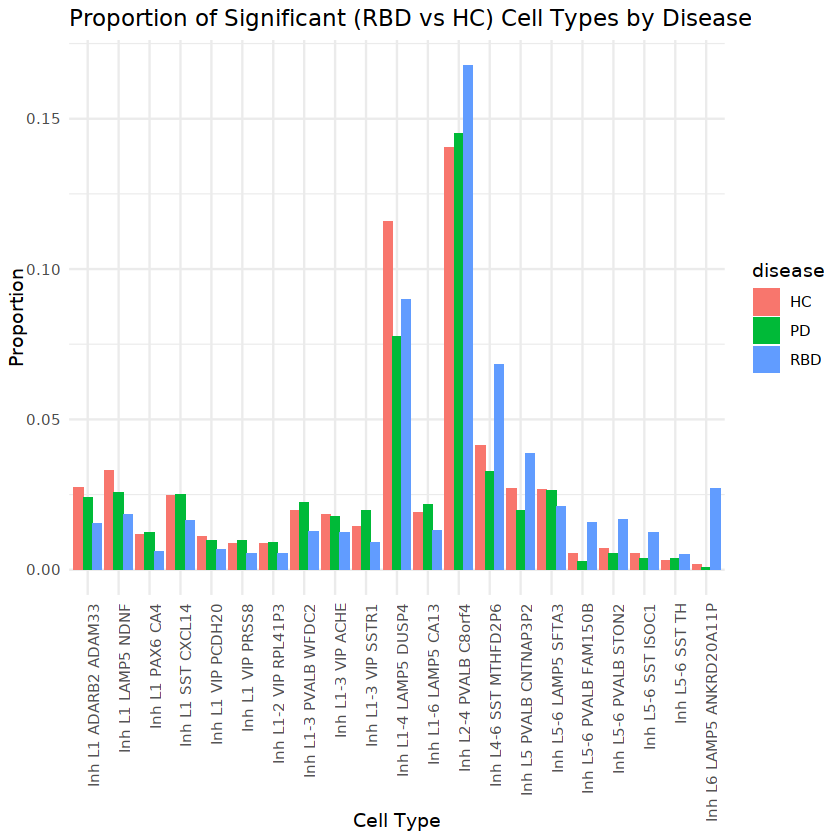

In [12]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Calculate proportions
proportions <- metadata %>%
  group_by(disease, predicted.id) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(disease) %>%
  mutate(Proportion = Count / sum(Count))

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (RBD vs HC) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [13]:
results <- two_prop_t_test(ifnb_testct_In, "PD", "HC")
results

CellType,Mean_Proportion_Compare1,Mean_Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L1-4 LAMP5 DUSP4,0.0776566757,1.158083e-01,3.119965e-19,1.684781e-17
Inh L1-3 VIP GGH,0.0286103542,1.868620e-02,9.627415e-07,2.599402e-05
Inh L3-5 SST MAFB,0.1393732970,1.190957e-01,1.073632e-05,1.932538e-04
Inh L2-4 SST AHR,0.0340599455,2.549167e-02,1.934023e-04,2.610931e-03
Inh L3-6 VIP KCTD13,0.0111716621,6.747794e-03,3.816697e-04,4.122033e-03
Inh L5 PVALB CNTNAP3P2,0.0196185286,2.699118e-02,6.621632e-04,5.959469e-03
Inh L1-5 VIP KCNJ2,0.0207084469,1.476440e-02,8.145654e-04,6.283790e-03
Inh L4-6 SST MTHFD2P6,0.0325613079,4.123652e-02,1.229937e-03,8.302076e-03
Inh L1 LAMP5 NDNF,0.0257493188,3.293154e-02,2.830862e-03,1.528666e-02


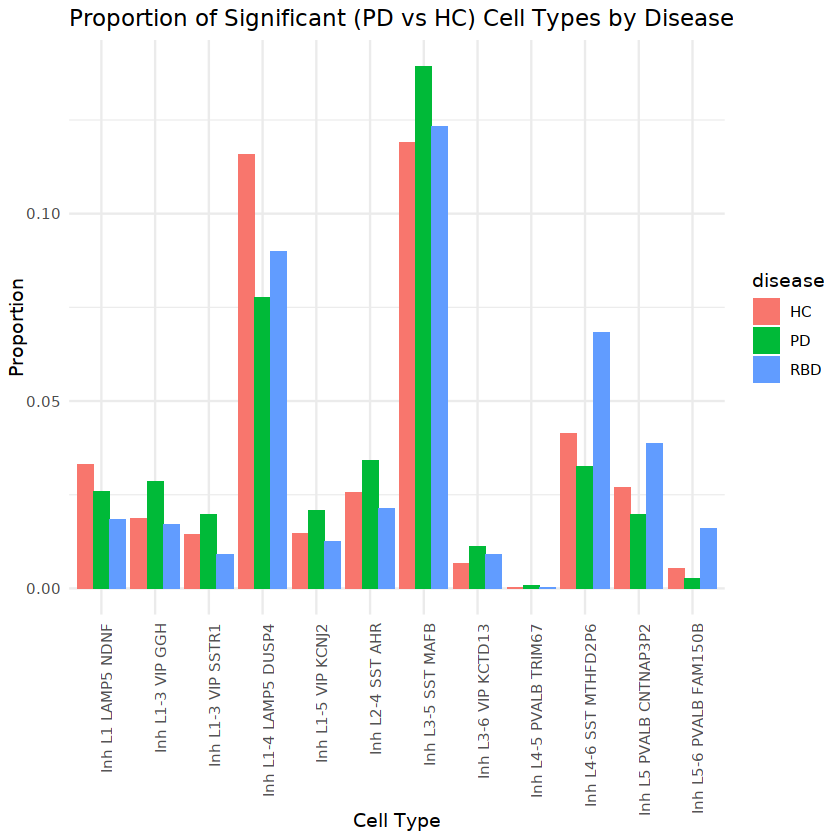

In [14]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (PD vs HC) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [15]:
results <- two_prop_t_test(ifnb_testct_In, "RBD", "PD")
results

CellType,Mean_Proportion_Compare1,Mean_Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L6 LAMP5 ANKRD20A11P,0.0268897150,0.0008174387,5.637100e-42,3.044034e-40
Inh L4-6 SST MTHFD2P6,0.0684014870,0.0325613079,6.414568e-24,1.731933e-22
Inh L5-6 PVALB FAM150B,0.0158612144,0.0027247956,6.295126e-17,1.133123e-15
Inh L5 PVALB CNTNAP3P2,0.0386617100,0.0196185286,3.119543e-12,4.211383e-11
Inh L5-6 PVALB STON2,0.0167286245,0.0053133515,2.047373e-11,2.211162e-10
Inh L5-6 SST ISOC1,0.0125154895,0.0038147139,3.149794e-09,2.834815e-08
Inh L1-3 VIP SSTR1,0.0090458488,0.0197547684,1.860490e-08,1.435235e-07
Inh L1-3 VIP GGH,0.0171003717,0.0286103542,1.550610e-06,9.954346e-06
Inh L2-4 SST AHR,0.0214374226,0.0340599455,1.659058e-06,9.954346e-06


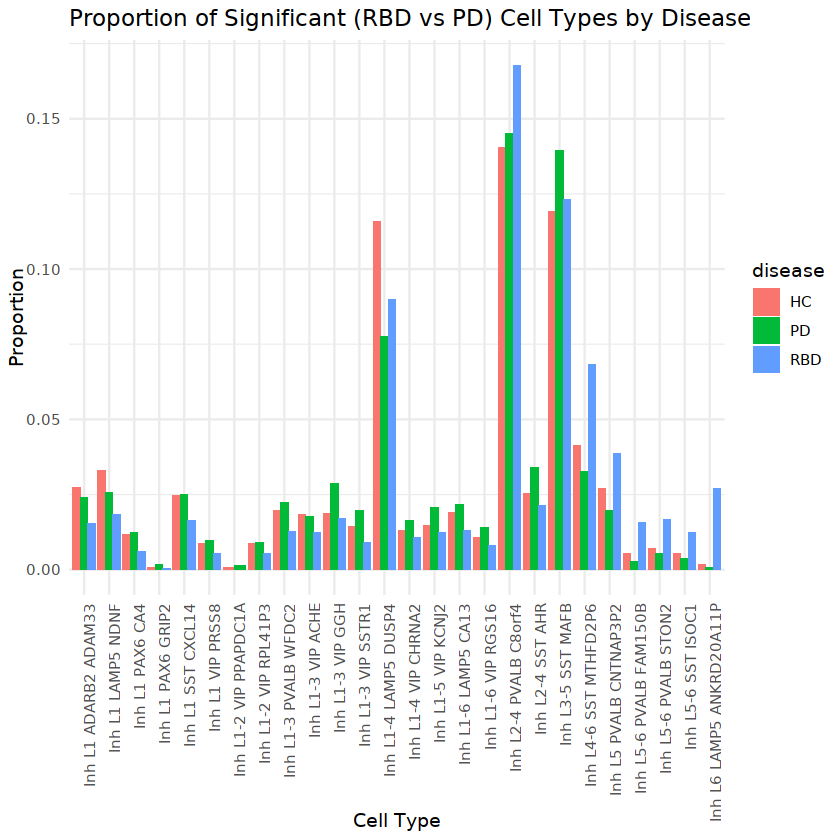

In [16]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (RBD vs PD) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Fisher's Exact Test

In [17]:
fisher_two_prop_test <- function(ifnb_testct_In, compare1, compare2){
    # Extract metadata
    metadata <- FetchData(ifnb_testct_In, vars = c("predicted.id", "disease"))
    
    # Filter for the two specified disease groups
    filtered_metadata <- metadata %>% filter(disease %in% c(compare1, compare2))
    
    # Initialize a results data frame
    results <- data.frame(
      CellType = character(),
      Proportion_Compare1 = numeric(),
      Proportion_Compare2 = numeric(),
      P_value = numeric(),
      stringsAsFactors = FALSE
    )
    
    # Get unique cell types
    cell_types <- unique(filtered_metadata$predicted.id)
    
    # Loop through each cell type
    for (cell_type in cell_types) {
        # Count the occurrences of the cell type in each disease group
        count_compare1 <- sum(filtered_metadata$predicted.id == cell_type & filtered_metadata$disease == compare1)
        count_compare2 <- sum(filtered_metadata$predicted.id == cell_type & filtered_metadata$disease == compare2)
        
        # Total cells in each disease group
        total_compare1 <- sum(filtered_metadata$disease == compare1)
        total_compare2 <- sum(filtered_metadata$disease == compare2)
        
        # If there are no cells of this type in both groups combined, skip
        if (count_compare1 + count_compare2 == 0) next
        
        # Construct the contingency table for Fisher's exact test
        contingency_table <- matrix(
            c(count_compare1, total_compare1 - count_compare1,
              count_compare2, total_compare2 - count_compare2),
            nrow = 2,
            byrow = TRUE
        )
        
        # Perform Fisher's exact test
        test <- fisher.test(contingency_table)
        
        # Store results
        results <- rbind(results, data.frame(
            CellType = cell_type,
            Proportion_Compare1 = count_compare1 / total_compare1,
            Proportion_Compare2 = count_compare2 / total_compare2,
            P_value = test$p.value
        ))
    }
    
    # Adjust p-values for multiple testing
    results$Adjusted_P_value <- p.adjust(results$P_value, method = "fdr")
    
    # Order by adjusted p-value
    results <- results %>% arrange(Adjusted_P_value)
    
    # print(results)
    return(results)
}

In [19]:
results <- fisher_two_prop_test(ifnb_testct_In, "RBD", "HC")
results

CellType,Proportion_Compare1,Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L6 LAMP5 ANKRD20A11P,0.0268897150,1.787877e-03,3.142257e-75,1.696819e-73
Inh L4-6 SST MTHFD2P6,0.0684014870,4.123652e-02,1.787775e-19,4.826994e-18
Inh L5-6 PVALB FAM150B,0.0158612144,5.248284e-03,5.334237e-16,9.601627e-15
Inh L5-6 PVALB STON2,0.0167286245,7.209182e-03,1.635727e-11,1.766585e-10
Inh L1 LAMP5 NDNF,0.0183395291,3.293154e-02,1.570872e-11,1.766585e-10
Inh L1-4 LAMP5 DUSP4,0.0898389095,1.158083e-01,3.142567e-10,2.828310e-09
Inh L1 ADARB2 ADAM33,0.0154894672,2.751024e-02,1.404773e-09,1.083682e-08
Inh L5-6 SST ISOC1,0.0125154895,5.305958e-03,3.321183e-09,2.241798e-08
Inh L2-4 PVALB C8orf4,0.1677819083,1.404349e-01,1.699585e-08,1.019751e-07


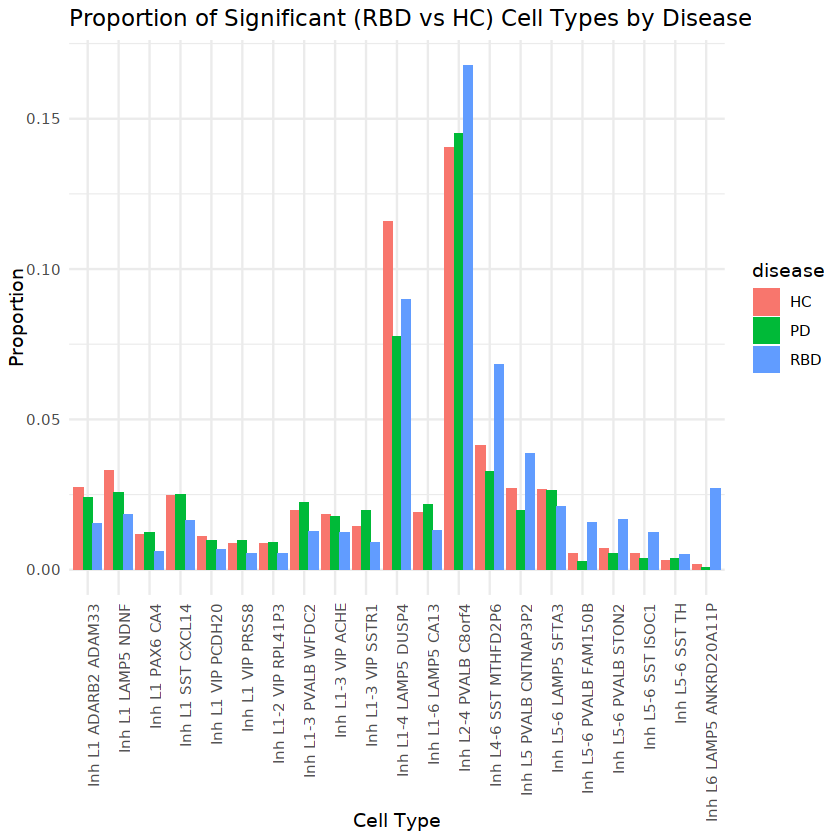

In [20]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Calculate proportions
proportions <- metadata %>%
  group_by(disease, predicted.id) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(disease) %>%
  mutate(Proportion = Count / sum(Count))

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (RBD vs HC) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [21]:
results <- fisher_two_prop_test(ifnb_testct_In, "PD", "HC")
results

CellType,Proportion_Compare1,Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L1-4 LAMP5 DUSP4,0.0776566757,1.158083e-01,4.549978e-20,2.456988e-18
Inh L1-3 VIP GGH,0.0286103542,1.868620e-02,1.977453e-06,5.339122e-05
Inh L3-5 SST MAFB,0.1393732970,1.190957e-01,1.312880e-05,2.363183e-04
Inh L2-4 SST AHR,0.0340599455,2.549167e-02,2.401024e-04,3.241382e-03
Inh L5 PVALB CNTNAP3P2,0.0196185286,2.699118e-02,5.580134e-04,5.212412e-03
Inh L3-6 VIP KCTD13,0.0111716621,6.747794e-03,5.791569e-04,5.212412e-03
Inh L1-5 VIP KCNJ2,0.0207084469,1.476440e-02,1.032101e-03,7.706329e-03
Inh L4-6 SST MTHFD2P6,0.0325613079,4.123652e-02,1.141678e-03,7.706329e-03
Inh L1 LAMP5 NDNF,0.0257493188,3.293154e-02,2.832681e-03,1.699609e-02


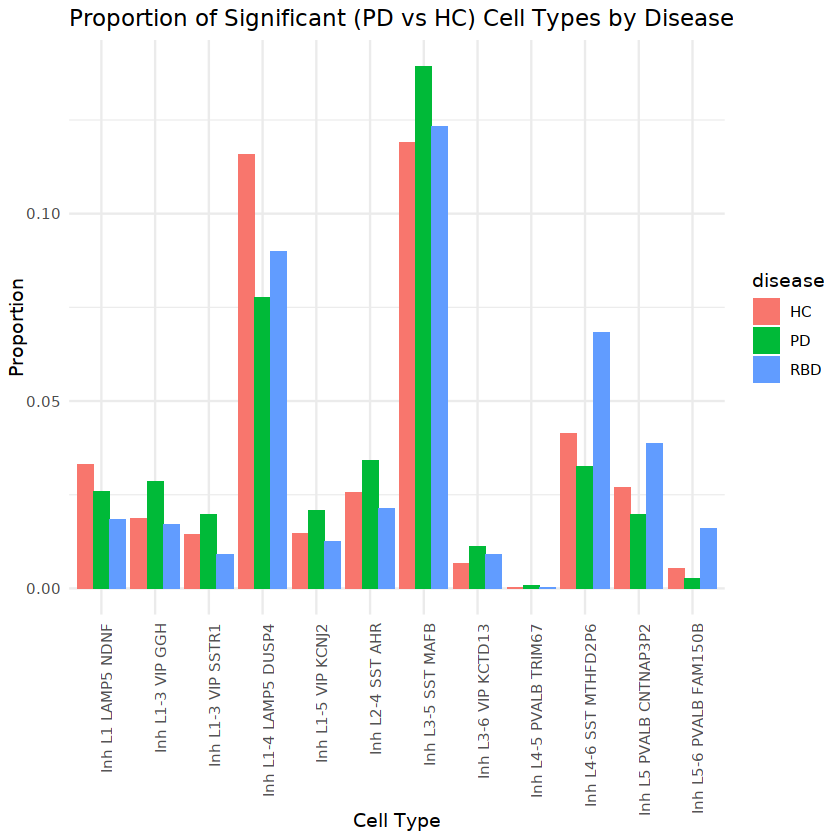

In [22]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (PD vs HC) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [24]:
results <- fisher_two_prop_test(ifnb_testct_In, "RBD", "PD")
results

CellType,Proportion_Compare1,Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Inh L6 LAMP5 ANKRD20A11P,0.0268897150,0.0008174387,8.297274e-53,4.480528e-51
Inh L4-6 SST MTHFD2P6,0.0684014870,0.0325613079,2.246381e-24,6.065228e-23
Inh L5-6 PVALB FAM150B,0.0158612144,0.0027247956,1.196385e-18,2.153494e-17
Inh L5 PVALB CNTNAP3P2,0.0386617100,0.0196185286,1.797051e-12,2.426019e-11
Inh L5-6 PVALB STON2,0.0167286245,0.0053133515,6.691311e-12,7.226615e-11
Inh L5-6 SST ISOC1,0.0125154895,0.0038147139,1.315449e-09,1.183904e-08
Inh L1-3 VIP SSTR1,0.0090458488,0.0197547684,2.199865e-08,1.697039e-07
Inh L1-3 VIP GGH,0.0171003717,0.0286103542,1.614916e-06,1.090068e-05
Inh L2-4 SST AHR,0.0214374226,0.0340599455,1.961302e-06,1.176781e-05


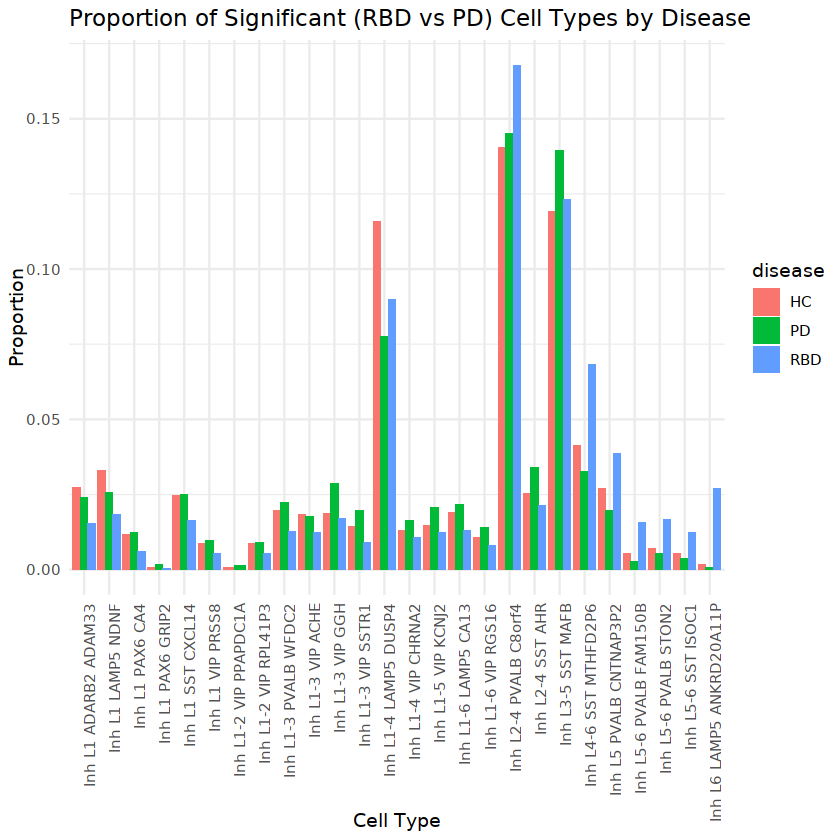

In [25]:
# Extract the subset of significant cell types
subset <- results$CellType[results$Adjusted_P_value < 0.05]

# Filter the proportions data for the subset of cell types and the desired diseases
proportions_subset <- proportions %>%
  filter(predicted.id %in% subset)

# Create the bar plot for the subset of cell types
ggplot(proportions_subset, aes(x = predicted.id, y = Proportion, fill = disease)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Proportion of Significant (RBD vs PD) Cell Types by Disease",
    x = "Cell Type",
    y = "Proportion"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))